In [ ]:
from BT import *
import json
import numpy as np
from eigentrust import *

In [12]:
import random

In [13]:
data_path = '20250513_025337'
data = []
filepath = f'transcript/{data_path}/evaluations_cleaned.json'
with open(filepath, 'r') as file:
    data.extend(json.load(file))

In [5]:
len(data)

2408

In [6]:
datasplit_1 = data[:1204]
datasplit_2 = data[1204:]
print(len(datasplit_1), len(datasplit_2))

1204 1204


In [25]:
def train_trust_matrix(data,epochs):
    comparisons = []

    for i, item in enumerate(data):
        response = item['judge response']
        m = re.search(r'<choice>(.)</choice>', response)
        if m:
            score = int(m.group(1))
            comparisons.append([item['judge'], item['eval1'], item['eval2'], score])

    batch_size=32
    dataset = PairwiseDataset(comparisons)
    dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

    num_models = 5
    d = 6

    lr = 1e-3
    weight_decay = 1e-4
    max_epochs = epochs
    tol=1e-3

    model = VectorBT(num_models, d)
    train_vector_bt(
        model, 
        dataloader,
        lr=lr, 
        weight_decay=weight_decay,
        max_epochs=max_epochs, 
        device='mps'
    )

    device = 'mps'
    S = compute_trust_matrix(model, device)
    C = row_normalize(S)

    return S,C

now testing samples with n=1200
Epoch  10, Loss = 0.6722
0.020659565925598145 0.027291014790534973
Epoch  20, Loss = 0.6634
0.011279463768005371 0.010843589901924133
Epoch  30, Loss = 0.6622
0.006139874458312988 0.007779031991958618
Epoch  40, Loss = 0.6615
0.005266809836030006 0.007558226585388184
Epoch  50, Loss = 0.6611
0.009716786444187164 0.005648869089782238
Epoch  60, Loss = 0.6607
0.006505623459815979 0.007558297365903854
Epoch  70, Loss = 0.6604
0.006271868944168091 0.006702244281768799
Epoch  80, Loss = 0.6602
0.007079511880874634 0.0056806206703186035
Epoch  90, Loss = 0.6598
0.004534449428319931 0.004789143800735474
Epoch 100, Loss = 0.6597
0.0054743047803640366 0.0056343674659729
Starting eigentrust iteration


  0%|          | 5/1000 [00:00<00:06, 164.56it/s]


Epoch  10, Loss = 0.6801
0.025623396039009094 0.026732325553894043
Epoch  20, Loss = 0.6673
0.015130072832107544 0.013295382261276245
Epoch  30, Loss = 0.6645
0.00894397497177124 0.009592287242412567
Epoch  40, Loss = 0.6638
0.004774183034896851 0.00718313455581665
Epoch  50, Loss = 0.6636
0.006453514099121094 0.0060371458530426025
Epoch  60, Loss = 0.6634
0.006616324186325073 0.0028091520071029663
Epoch  70, Loss = 0.6635
0.004997327923774719 0.005994260311126709
Epoch  80, Loss = 0.6634
0.005511641502380371 0.006214141845703125
Epoch  90, Loss = 0.6633
0.0033919811248779297 0.003348052501678467
Epoch 100, Loss = 0.6633
0.006668027490377426 0.007951974868774414
Starting eigentrust iteration


  1%|          | 6/1000 [00:00<00:02, 416.96it/s]

now testing samples with n=1100


Epoch  10, Loss = 0.6747
0.017602883279323578 0.02167205512523651
Epoch  20, Loss = 0.6659
0.011519432067871094 0.012413561344146729
Epoch  30, Loss = 0.6641
0.00992611050605774 0.006737671792507172
Epoch  40, Loss = 0.6625
0.011259675025939941 0.009478151798248291
Epoch  50, Loss = 0.6612
0.007270738482475281 0.009996801614761353
Epoch  60, Loss = 0.6603
0.006567597389221191 0.006159849464893341
Epoch  70, Loss = 0.6598
0.004351899027824402 0.003805696964263916
Epoch  80, Loss = 0.6598
0.004642516374588013 0.006557151675224304
Epoch  90, Loss = 0.6596
0.005607232451438904 0.004959225654602051
Epoch 100, Loss = 0.6596
0.0035260021686553955 0.004417873919010162
Epoch 110, Loss = 0.6596
0.0041116029024124146 0.005244642496109009
Epoch 120, Loss = 0.6595
0.005367547273635864 0.005354896187782288
Epoch 130, Loss = 0.6595
0.003111600875854492 0.0027195438742637634
Epoch 140, Loss = 0.6596
0.005030572414398193 0.005569040775299072
Epoch 150, Loss = 0.6596
0.0042523592710494995 0.004873096942

  1%|          | 6/1000 [00:00<00:00, 1583.55it/s]


Epoch  10, Loss = 0.6749
0.020341068506240845 0.026168346405029297
Epoch  20, Loss = 0.6645
0.01355278491973877 0.009204477071762085
Epoch  30, Loss = 0.6627
0.011788003146648407 0.010210543870925903
Epoch  40, Loss = 0.6619
0.005415767431259155 0.0047013163566589355
Epoch  50, Loss = 0.6616
0.006170779466629028 0.0036328136920928955
Epoch  60, Loss = 0.6615
0.007307976484298706 0.00736813060939312
Epoch  70, Loss = 0.6613
0.005262613296508789 0.0058309584856033325
Epoch  80, Loss = 0.6613
0.0037988126277923584 0.0024233460426330566
Epoch  90, Loss = 0.6612
0.005539067089557648 0.00553816556930542
Epoch 100, Loss = 0.6610
0.003597874194383621 0.003192722797393799
Epoch 110, Loss = 0.6610
0.0027830302715301514 0.0036728084087371826
Epoch 120, Loss = 0.6609
0.0039040446281433105 0.0054852962493896484
Epoch 130, Loss = 0.6609
0.006955087184906006 0.005481719970703125
Epoch 140, Loss = 0.6610
0.005554556846618652 0.004470229148864746
Epoch 150, Loss = 0.6608
0.005124107003211975 0.00526478

  1%|          | 6/1000 [00:00<00:00, 1241.16it/s]

now testing samples with n=1000


Epoch  10, Loss = 0.6781
0.027070850133895874 0.029666751623153687
Epoch  20, Loss = 0.6640
0.013342022895812988 0.01821756362915039
Epoch  30, Loss = 0.6613
0.013215869665145874 0.013987213373184204
Epoch  40, Loss = 0.6595
0.008358150720596313 0.008016496896743774
Epoch  50, Loss = 0.6584
0.005201175808906555 0.006992161273956299
Epoch  60, Loss = 0.6576
0.0053157806396484375 0.010170906782150269
Epoch  70, Loss = 0.6571
0.006343204528093338 0.007927250117063522
Epoch  80, Loss = 0.6570
0.004847168922424316 0.004460468888282776
Epoch  90, Loss = 0.6570
0.003316722810268402 0.0044672489166259766
Epoch 100, Loss = 0.6568
0.004398167133331299 0.005411356687545776
Epoch 110, Loss = 0.6568
0.006424248218536377 0.005758225917816162
Epoch 120, Loss = 0.6567
0.004972785711288452 0.0054467469453811646
Epoch 130, Loss = 0.6568
0.005989491939544678 0.006736695766448975
Epoch 140, Loss = 0.6568
0.004974678158760071 0.0034652352333068848
Epoch 150, Loss = 0.6566
0.005224764347076416 0.00399091839

  1%|          | 6/1000 [00:00<00:00, 1267.16it/s]


Epoch  10, Loss = 0.6824
0.023645684123039246 0.026605427265167236
Epoch  20, Loss = 0.6665
0.011479824781417847 0.013154268264770508
Epoch  30, Loss = 0.6631
0.008924007415771484 0.009244680404663086
Epoch  40, Loss = 0.6618
0.006543484516441822 0.003921329975128174
Epoch  50, Loss = 0.6612
0.0036301910877227783 0.005148187279701233
Epoch  60, Loss = 0.6609
0.007265552878379822 0.0058947354555130005
Epoch  70, Loss = 0.6605
0.004871010780334473 0.005945220589637756
Epoch  80, Loss = 0.6606
0.005770742893218994 0.00530669093132019
Epoch  90, Loss = 0.6604
0.00566333532333374 0.005677526816725731
Epoch 100, Loss = 0.6603
0.004727303981781006 0.0047675371170043945
Epoch 110, Loss = 0.6602
0.004996582865715027 0.0049184635281562805
Epoch 120, Loss = 0.6601
0.003107726573944092 0.004010617733001709
Epoch 130, Loss = 0.6602
0.005010485649108887 0.006001994013786316
Epoch 140, Loss = 0.6602
0.006105750799179077 0.004998788237571716
Epoch 150, Loss = 0.6600
0.005897983908653259 0.003577373921

  1%|          | 6/1000 [00:00<00:00, 1030.41it/s]

now testing samples with n=900


Epoch  10, Loss = 0.6820
0.015665888786315918 0.020980432629585266
Epoch  20, Loss = 0.6647
0.010797753930091858 0.012817710638046265
Epoch  30, Loss = 0.6586
0.010246127843856812 0.011895835399627686
Epoch  40, Loss = 0.6568
0.010437726974487305 0.010939300060272217
Epoch  50, Loss = 0.6562
0.00962517037987709 0.008434921503067017
Epoch  60, Loss = 0.6560
0.012119017541408539 0.008205190300941467
Epoch  70, Loss = 0.6557
0.0053484439849853516 0.007008083164691925
Epoch  80, Loss = 0.6557
0.005296260118484497 0.005368053913116455
Epoch  90, Loss = 0.6556
0.0044089555740356445 0.004149526357650757
Epoch 100, Loss = 0.6556
0.005943670868873596 0.006614387035369873
Epoch 110, Loss = 0.6556
0.007745027542114258 0.004985421895980835
Epoch 120, Loss = 0.6555
0.005593582987785339 0.00589066743850708
Epoch 130, Loss = 0.6556
0.005723640322685242 0.00609666109085083
Epoch 140, Loss = 0.6555
0.009629279375076294 0.008490502834320068
Epoch 150, Loss = 0.6555
0.0056416988372802734 0.00465242564678

  1%|          | 6/1000 [00:00<00:00, 1411.11it/s]


Epoch  10, Loss = 0.6841
0.022117355838418007 0.014213025569915771
Epoch  20, Loss = 0.6713
0.02017807960510254 0.016512006521224976
Epoch  30, Loss = 0.6645
0.010958611965179443 0.010800004005432129
Epoch  40, Loss = 0.6620
0.010326415300369263 0.0095348060131073
Epoch  50, Loss = 0.6612
0.005671411752700806 0.005670040845870972
Epoch  60, Loss = 0.6607
0.006771475076675415 0.006165728904306889
Epoch  70, Loss = 0.6603
0.0052301883697509766 0.007793592754751444
Epoch  80, Loss = 0.6601
0.006804853677749634 0.004775255918502808
Epoch  90, Loss = 0.6600
0.004255145788192749 0.0036002695560455322
Epoch 100, Loss = 0.6599
0.00460052490234375 0.0053462982177734375
Epoch 110, Loss = 0.6598
0.006285309791564941 0.006883829832077026
Epoch 120, Loss = 0.6597
0.004579558968544006 0.006380528211593628
Epoch 130, Loss = 0.6598
0.0072515010833740234 0.007070973515510559
Epoch 140, Loss = 0.6598
0.006727501749992371 0.0067833587527275085
Epoch 150, Loss = 0.6598
0.0059497058391571045 0.006196647882

  1%|          | 6/1000 [00:00<00:00, 1280.18it/s]

now testing samples with n=800


Epoch  10, Loss = 0.6850
0.020721435546875 0.03345653414726257
Epoch  20, Loss = 0.6673
0.011320561170578003 0.014854222536087036
Epoch  30, Loss = 0.6630
0.010636776685714722 0.013774998486042023
Epoch  40, Loss = 0.6612
0.006168678402900696 0.005379915237426758
Epoch  50, Loss = 0.6601
0.004556640982627869 0.00454692542552948
Epoch  60, Loss = 0.6595
0.004905790090560913 0.003618597984313965
Epoch  70, Loss = 0.6593
0.0035048723220825195 0.003301277756690979
Epoch  80, Loss = 0.6592
0.0034464597702026367 0.003674536943435669
Epoch  90, Loss = 0.6590
0.0039778053760528564 0.004090726375579834
Epoch 100, Loss = 0.6589
0.004444718360900879 0.004908561706542969
Epoch 110, Loss = 0.6589
0.007000654935836792 0.006926208734512329
Epoch 120, Loss = 0.6586
0.004074707627296448 0.0036664679646492004
Epoch 130, Loss = 0.6586
0.006672114133834839 0.005938231945037842
Epoch 140, Loss = 0.6584
0.005682110786437988 0.005226492881774902
Epoch 150, Loss = 0.6583
0.0032755136489868164 0.00382357835769

  1%|          | 6/1000 [00:00<00:01, 974.66it/s]


Epoch  10, Loss = 0.6792
0.022304147481918335 0.025996774435043335
Epoch  20, Loss = 0.6641
0.012026160955429077 0.011282920837402344
Epoch  30, Loss = 0.6595
0.00796043872833252 0.011044055223464966
Epoch  40, Loss = 0.6579
0.008139610290527344 0.00737336277961731
Epoch  50, Loss = 0.6569
0.005108784418553114 0.007720053195953369
Epoch  60, Loss = 0.6564
0.005720198154449463 0.006226563826203346
Epoch  70, Loss = 0.6561
0.003492385149002075 0.004590381868183613
Epoch  80, Loss = 0.6561
0.003114849328994751 0.0050920285284519196
Epoch  90, Loss = 0.6559
0.004646148532629013 0.005384236574172974
Epoch 100, Loss = 0.6558
0.006923624314367771 0.005139768123626709
Epoch 110, Loss = 0.6558
0.004712611436843872 0.004026487469673157
Epoch 120, Loss = 0.6558
0.004779189825057983 0.003912389278411865
Epoch 130, Loss = 0.6558
0.004396714270114899 0.0026231110095977783
Epoch 140, Loss = 0.6557
0.0039650797843933105 0.004011210054159164
Epoch 150, Loss = 0.6557
0.004934057593345642 0.0046376585960

  1%|          | 7/1000 [00:00<00:00, 1005.62it/s]

now testing samples with n=700


Epoch  10, Loss = 0.6819
0.017564505338668823 0.020223468542099
Epoch  20, Loss = 0.6617
0.014036574400961399 0.012385308742523193
Epoch  30, Loss = 0.6534
0.009041130542755127 0.009247757494449615
Epoch  40, Loss = 0.6501
0.006724327802658081 0.00842025876045227
Epoch  50, Loss = 0.6489
0.005849018692970276 0.005553916096687317
Epoch  60, Loss = 0.6482
0.00306740403175354 0.003930032253265381
Epoch  70, Loss = 0.6480
0.00445324182510376 0.004703953862190247
Epoch  80, Loss = 0.6479
0.00460478663444519 0.004701077938079834
Epoch  90, Loss = 0.6478
0.004250004887580872 0.003912746906280518
Epoch 100, Loss = 0.6478
0.0036790966987609863 0.004062384366989136
Epoch 110, Loss = 0.6477
0.003123849630355835 0.002890348434448242
Epoch 120, Loss = 0.6478
0.0040116459131240845 0.002362966537475586
Epoch 130, Loss = 0.6479
0.0034836530685424805 0.005732357501983643
Epoch 140, Loss = 0.6477
0.0037403106689453125 0.005407571792602539
Epoch 150, Loss = 0.6477
0.003870368003845215 0.00385852903127670

  1%|          | 7/1000 [00:00<00:00, 1690.47it/s]


Epoch  10, Loss = 0.6851
0.018497124314308167 0.021177366375923157
Epoch  20, Loss = 0.6681
0.01587456464767456 0.017125606536865234
Epoch  30, Loss = 0.6583
0.01036989688873291 0.010969683527946472
Epoch  40, Loss = 0.6546
0.009873807430267334 0.0094681978225708
Epoch  50, Loss = 0.6521
0.007263898849487305 0.00956350564956665
Epoch  60, Loss = 0.6503
0.005167536437511444 0.005769789218902588
Epoch  70, Loss = 0.6492
0.005813658237457275 0.006553590297698975
Epoch  80, Loss = 0.6488
0.0045375823974609375 0.0055016279220581055
Epoch  90, Loss = 0.6484
0.003465026617050171 0.0025725960731506348
Epoch 100, Loss = 0.6481
0.003685891628265381 0.0038946866989135742
Epoch 110, Loss = 0.6482
0.0028071999549865723 0.0033538490533828735
Epoch 120, Loss = 0.6481
0.003399953246116638 0.002862967550754547
Epoch 130, Loss = 0.6480
0.003228049725294113 0.002842262387275696
Epoch 140, Loss = 0.6481
0.004572808742523193 0.003974542021751404
Epoch 150, Loss = 0.6481
0.00517977774143219 0.00518527626991

  1%|          | 7/1000 [00:00<00:00, 1261.72it/s]

now testing samples with n=600


Epoch  10, Loss = 0.6870
0.013583853840827942 0.01371854543685913
Epoch  20, Loss = 0.6750
0.01725282520055771 0.012919135391712189
Epoch  30, Loss = 0.6641
0.012252524495124817 0.013285815715789795
Epoch  40, Loss = 0.6594
0.008582979440689087 0.010398715734481812
Epoch  50, Loss = 0.6575
0.0061033666133880615 0.007416844367980957
Epoch  60, Loss = 0.6567
0.003097057342529297 0.0038528144359588623
Epoch  70, Loss = 0.6562
0.004985392093658447 0.003974348306655884
Epoch  80, Loss = 0.6559
0.0032743364572525024 0.0038832426071166992
Epoch  90, Loss = 0.6557
0.004040462896227837 0.00409930944442749
Epoch 100, Loss = 0.6556
0.0046208202838897705 0.003110170364379883
Epoch 110, Loss = 0.6555
0.003429405391216278 0.00267869234085083
Epoch 120, Loss = 0.6555
0.004371926188468933 0.0037517249584198
Epoch 130, Loss = 0.6553
0.0029720067977905273 0.0033324509859085083
Epoch 140, Loss = 0.6552
0.0027840733528137207 0.003264307975769043
Epoch 150, Loss = 0.6551
0.002634763717651367 0.002684712409

  1%|          | 7/1000 [00:00<00:01, 983.85it/s]


Epoch  10, Loss = 0.6891
0.018159210681915283 0.018076039850711823
Epoch  20, Loss = 0.6765
0.020038515329360962 0.02367454767227173
Epoch  30, Loss = 0.6629
0.011694028973579407 0.013295739889144897
Epoch  40, Loss = 0.6564
0.007453709840774536 0.007851183414459229
Epoch  50, Loss = 0.6538
0.008042722940444946 0.008435636758804321
Epoch  60, Loss = 0.6521
0.0047643184661865234 0.00405392050743103
Epoch  70, Loss = 0.6512
0.00710982084274292 0.007303297519683838
Epoch  80, Loss = 0.6504
0.005377471446990967 0.00450819730758667
Epoch  90, Loss = 0.6500
0.005857095122337341 0.0038189589977264404
Epoch 100, Loss = 0.6497
0.0039775073528289795 0.0032411813735961914
Epoch 110, Loss = 0.6495
0.00296938419342041 0.0031047072261571884
Epoch 120, Loss = 0.6494
0.0031865835189819336 0.003602946875616908
Epoch 130, Loss = 0.6494
0.003177464008331299 0.0028463006019592285
Epoch 140, Loss = 0.6494
0.0032265260815620422 0.004561573266983032
Epoch 150, Loss = 0.6494
0.004616379737854004 0.00486004352

  1%|          | 7/1000 [00:00<00:00, 1554.52it/s]

now testing samples with n=500


Epoch  10, Loss = 0.6872
0.012643858790397644 0.013343371450901031
Epoch  20, Loss = 0.6759
0.011597633361816406 0.009836539626121521
Epoch  30, Loss = 0.6654
0.00941401720046997 0.009439006447792053
Epoch  40, Loss = 0.6601
0.005897924304008484 0.00532647967338562
Epoch  50, Loss = 0.6580
0.007145524024963379 0.00691598653793335
Epoch  60, Loss = 0.6565
0.004660081118345261 0.003933250904083252
Epoch  70, Loss = 0.6557
0.0039163511246442795 0.003887563943862915
Epoch  80, Loss = 0.6551
0.003489673137664795 0.0028404593467712402
Epoch  90, Loss = 0.6545
0.003383822739124298 0.002673085778951645
Epoch 100, Loss = 0.6542
0.00448530912399292 0.0033060014247894287
Epoch 110, Loss = 0.6539
0.002574548125267029 0.0024017393589019775
Epoch 120, Loss = 0.6537
0.0032770633697509766 0.0023944079875946045
Epoch 130, Loss = 0.6535
0.0033604204654693604 0.0038132965564727783
Epoch 140, Loss = 0.6534
0.0033751726150512695 0.004113972187042236
Epoch 150, Loss = 0.6532
0.003880709409713745 0.004954904

  1%|          | 7/1000 [00:00<00:00, 1069.16it/s]


Epoch  10, Loss = 0.6836
0.01051117479801178 0.01378999650478363
Epoch  20, Loss = 0.6731
0.01145048439502716 0.013472110033035278
Epoch  30, Loss = 0.6621
0.011882036924362183 0.011646091938018799
Epoch  40, Loss = 0.6546
0.0076728761196136475 0.006852686405181885
Epoch  50, Loss = 0.6510
0.0055921077728271484 0.004861503839492798
Epoch  60, Loss = 0.6495
0.005852997303009033 0.006123363971710205
Epoch  70, Loss = 0.6489
0.0028566867113113403 0.002347387373447418
Epoch  80, Loss = 0.6487
0.0033769607543945312 0.0048042237758636475
Epoch  90, Loss = 0.6487
0.005326747894287109 0.004398167133331299
Epoch 100, Loss = 0.6483
0.0026498734951019287 0.002304747700691223
Epoch 110, Loss = 0.6484
0.003867045044898987 0.0036941273137927055
Epoch 120, Loss = 0.6483
0.002132892608642578 0.002611786127090454
Epoch 130, Loss = 0.6483
0.0026672780513763428 0.001676321029663086
Epoch 140, Loss = 0.6483
0.0024037063121795654 0.0030632317066192627
Epoch 150, Loss = 0.6483
0.003128156065940857 0.0038846

  1%|          | 7/1000 [00:00<00:00, 1042.77it/s]

now testing samples with n=400


Epoch  10, Loss = 0.6877
0.01033598929643631 0.010041221976280212
Epoch  20, Loss = 0.6776
0.01015499234199524 0.008972182869911194
Epoch  30, Loss = 0.6672
0.009206444025039673 0.00888456404209137
Epoch  40, Loss = 0.6612
0.006272956728935242 0.006300494074821472
Epoch  50, Loss = 0.6580
0.005278050899505615 0.005777135491371155
Epoch  60, Loss = 0.6555
0.0071128010749816895 0.004263550043106079
Epoch  70, Loss = 0.6537
0.004294604063034058 0.0035906732082366943
Epoch  80, Loss = 0.6520
0.004956915974617004 0.004315763711929321
Epoch  90, Loss = 0.6507
0.004820019006729126 0.0036710500717163086
Epoch 100, Loss = 0.6497
0.004297524690628052 0.004358351230621338
Epoch 110, Loss = 0.6488
0.004768013954162598 0.003751009702682495
Epoch 120, Loss = 0.6481
0.0037191100418567657 0.0031244754791259766
Epoch 130, Loss = 0.6477
0.0028553009033203125 0.003396272659301758
Epoch 140, Loss = 0.6474
0.0034349560737609863 0.0025140345096588135
Epoch 150, Loss = 0.6472
0.002909865230321884 0.002521932

  1%|          | 7/1000 [00:00<00:01, 932.48it/s]


Epoch  10, Loss = 0.6839
0.010546848177909851 0.013289272785186768
Epoch  20, Loss = 0.6722
0.01093052327632904 0.012495249509811401
Epoch  30, Loss = 0.6620
0.009796008467674255 0.009137511253356934
Epoch  40, Loss = 0.6555
0.008279293775558472 0.007673293352127075
Epoch  50, Loss = 0.6512
0.007160097360610962 0.005519673228263855
Epoch  60, Loss = 0.6482
0.0073136985301971436 0.007660895586013794
Epoch  70, Loss = 0.6461
0.00584307499229908 0.006962716579437256
Epoch  80, Loss = 0.6444
0.0038962960243225098 0.004391312599182129
Epoch  90, Loss = 0.6430
0.0037002861499786377 0.003619253635406494
Epoch 100, Loss = 0.6420
0.0034748315811157227 0.003599196672439575
Epoch 110, Loss = 0.6411
0.004177093505859375 0.0039990246295928955
Epoch 120, Loss = 0.6404
0.004208043217658997 0.0036498606204986572
Epoch 130, Loss = 0.6400
0.0032708346843719482 0.0038613900542259216
Epoch 140, Loss = 0.6396
0.0035494565963745117 0.003214627504348755
Epoch 150, Loss = 0.6393
0.0022634267807006836 0.001963

  1%|          | 8/1000 [00:00<00:00, 1606.40it/s]

now testing samples with n=300


Epoch  10, Loss = 0.6897
0.00731339305639267 0.007505036890506744
Epoch  20, Loss = 0.6826
0.008749991655349731 0.009645819664001465
Epoch  30, Loss = 0.6720
0.009070128202438354 0.009527429938316345
Epoch  40, Loss = 0.6607
0.00939294695854187 0.009401470422744751
Epoch  50, Loss = 0.6518
0.006211638450622559 0.0073677003383636475
Epoch  60, Loss = 0.6463
0.007957637310028076 0.007419079542160034
Epoch  70, Loss = 0.6425
0.005080908536911011 0.005158960819244385
Epoch  80, Loss = 0.6403
0.0039581358432769775 0.004901230335235596
Epoch  90, Loss = 0.6388
0.0023931311443448067 0.0023393630981445312
Epoch 100, Loss = 0.6379
0.002304166555404663 0.003448784351348877
Epoch 110, Loss = 0.6372
0.0027870237827301025 0.0031310878694057465
Epoch 120, Loss = 0.6368
0.002209275960922241 0.0017879009246826172
Epoch 130, Loss = 0.6366
0.002709805965423584 0.0027076005935668945
Epoch 140, Loss = 0.6365
0.0018171072006225586 0.0017420649528503418
Epoch 150, Loss = 0.6364
0.002834141254425049 0.002359

  1%|          | 10/1000 [00:00<00:00, 1531.21it/s]


Epoch  10, Loss = 0.6850
0.00701238214969635 0.008127272129058838
Epoch  20, Loss = 0.6759
0.008415907621383667 0.010508731007575989
Epoch  30, Loss = 0.6649
0.00862814486026764 0.010376334190368652
Epoch  40, Loss = 0.6559
0.0059355199337005615 0.006698787212371826
Epoch  50, Loss = 0.6497
0.0068616122007369995 0.006853669881820679
Epoch  60, Loss = 0.6457
0.00491294264793396 0.004552692174911499
Epoch  70, Loss = 0.6430
0.003285825252532959 0.0039040744304656982
Epoch  80, Loss = 0.6414
0.005597889423370361 0.005226641893386841
Epoch  90, Loss = 0.6400
0.004731416702270508 0.0035966038703918457
Epoch 100, Loss = 0.6390
0.0033338069915771484 0.003779768943786621
Epoch 110, Loss = 0.6381
0.0030173659324645996 0.0030753016471862793
Epoch 120, Loss = 0.6374
0.0026436150074005127 0.0034671127796173096
Epoch 130, Loss = 0.6367
0.0036400258541107178 0.004155188798904419
Epoch 140, Loss = 0.6359
0.002712160348892212 0.0029475390911102295
Epoch 150, Loss = 0.6354
0.0029968246817588806 0.00318

  1%|          | 6/1000 [00:00<00:00, 1469.88it/s]

now testing samples with n=200


Epoch  10, Loss = 0.6885
0.004957303404808044 0.005552127957344055
Epoch  20, Loss = 0.6853
0.004672706127166748 0.004390783607959747
Epoch  30, Loss = 0.6813
0.00539889931678772 0.006121188402175903
Epoch  40, Loss = 0.6766
0.006108209490776062 0.00643196702003479
Epoch  50, Loss = 0.6714
0.005195319652557373 0.005382627248764038
Epoch  60, Loss = 0.6666
0.005688905715942383 0.0062806010246276855
Epoch  70, Loss = 0.6624
0.004433810710906982 0.005544841289520264
Epoch  80, Loss = 0.6591
0.006910651922225952 0.004724979400634766
Epoch  90, Loss = 0.6564
0.0050116777420043945 0.0042653679847717285
Epoch 100, Loss = 0.6542
0.0032004714012145996 0.0035039186477661133
Epoch 110, Loss = 0.6526
0.0033214688301086426 0.003598719835281372
Epoch 120, Loss = 0.6515
0.0032081156969070435 0.0025665462017059326
Epoch 130, Loss = 0.6506
0.0023716017603874207 0.0026259422302246094
Epoch 140, Loss = 0.6501
0.0034846067428588867 0.002917736768722534
Epoch 150, Loss = 0.6495
0.0034809857606887817 0.0026

/Users/jchang153/Documents/GitHub/EigenBench/BT.py:103: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


Epoch 600, Loss = 0.6462
0.0024664700031280518 0.002457141876220703
Starting eigentrust iteration


  1%|▏         | 13/1000 [00:00<00:00, 1725.50it/s]


Epoch  10, Loss = 0.6870
0.005456894636154175 0.0053647905588150024
Epoch  20, Loss = 0.6799
0.0062096863985061646 0.006777152419090271
Epoch  30, Loss = 0.6699
0.00616011768579483 0.008117824792861938
Epoch  40, Loss = 0.6576
0.006740853190422058 0.008474409580230713
Epoch  50, Loss = 0.6443
0.006236284971237183 0.008219718933105469
Epoch  60, Loss = 0.6328
0.006147563457489014 0.007726520299911499
Epoch  70, Loss = 0.6237
0.004706442356109619 0.005464524030685425
Epoch  80, Loss = 0.6177
0.004556834697723389 0.005332887172698975
Epoch  90, Loss = 0.6132
0.0034635066986083984 0.005133867263793945
Epoch 100, Loss = 0.6101
0.002710580825805664 0.003315269947052002
Epoch 110, Loss = 0.6076
0.0031281113624572754 0.0036637187004089355
Epoch 120, Loss = 0.6058
0.00264817476272583 0.0028078705072402954
Epoch 130, Loss = 0.6045
0.002647310495376587 0.0022573471069335938
Epoch 140, Loss = 0.6033
0.0038605928421020508 0.0029420852661132812
Epoch 150, Loss = 0.6024
0.0015146434307098389 0.001565

  1%|          | 11/1000 [00:00<00:00, 1727.08it/s]

now testing samples with n=100


Epoch  10, Loss = 0.6910
0.002531014382839203 0.0024096835404634476
Epoch  20, Loss = 0.6899
0.0036386027932167053 0.003124520182609558
Epoch  30, Loss = 0.6886
0.003143310546875 0.002399332821369171
Epoch  40, Loss = 0.6868
0.0025039762258529663 0.0027497708797454834
Epoch  50, Loss = 0.6848
0.0030150413513183594 0.0037124156951904297
Epoch  60, Loss = 0.6827
0.003275737166404724 0.003017619252204895
Epoch  70, Loss = 0.6801
0.0026888102293014526 0.002745702862739563
Epoch  80, Loss = 0.6773
0.002885103225708008 0.0031726211309432983
Epoch  90, Loss = 0.6743
0.0033593475818634033 0.0034005194902420044
Epoch 100, Loss = 0.6713
0.0026784539222717285 0.002988845109939575
Epoch 110, Loss = 0.6680
0.003851979970932007 0.0031703412532806396
Epoch 120, Loss = 0.6643
0.004019290208816528 0.004313111305236816
Epoch 130, Loss = 0.6606
0.0036525726318359375 0.003258943557739258
Epoch 140, Loss = 0.6569
0.003433823585510254 0.004003256559371948
Epoch 150, Loss = 0.6530
0.0033184289932250977 0.002

  2%|▎         | 25/1000 [00:00<00:00, 1895.10it/s]

Epoch  10, Loss = 0.6851
0.0031788647174835205 0.002816544845700264


Epoch  20, Loss = 0.6809
0.0032657086849212646 0.0032648779451847076
Epoch  30, Loss = 0.6754
0.003883771598339081 0.0034080594778060913
Epoch  40, Loss = 0.6689
0.005164057016372681 0.0049058496952056885
Epoch  50, Loss = 0.6608
0.00453968346118927 0.0035697370767593384
Epoch  60, Loss = 0.6520
0.004827708005905151 0.004696831107139587
Epoch  70, Loss = 0.6428
0.004248827695846558 0.004592031240463257
Epoch  80, Loss = 0.6338
0.0035583674907684326 0.003360569477081299
Epoch  90, Loss = 0.6260
0.0035550296306610107 0.0035768449306488037
Epoch 100, Loss = 0.6181
0.004056811332702637 0.0037638843059539795
Epoch 110, Loss = 0.6108
0.0035758614540100098 0.004411578178405762
Epoch 120, Loss = 0.6033
0.005079925060272217 0.004271268844604492
Epoch 130, Loss = 0.5965
0.003365755081176758 0.0029005110263824463
Epoch 140, Loss = 0.5915
0.002872645854949951 0.002970665693283081
Epoch 150, Loss = 0.5866
0.003597557544708252 0.0033266395330429077
Epoch 160, Loss = 0.5822
0.003938615322113037 0.002

  8%|▊         | 79/1000 [00:00<00:00, 2093.55it/s]


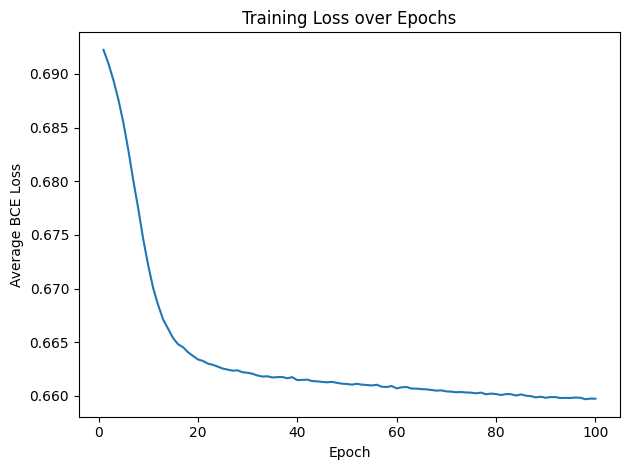

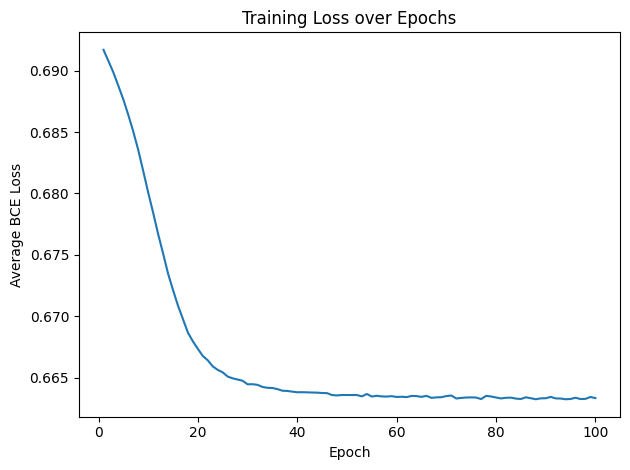

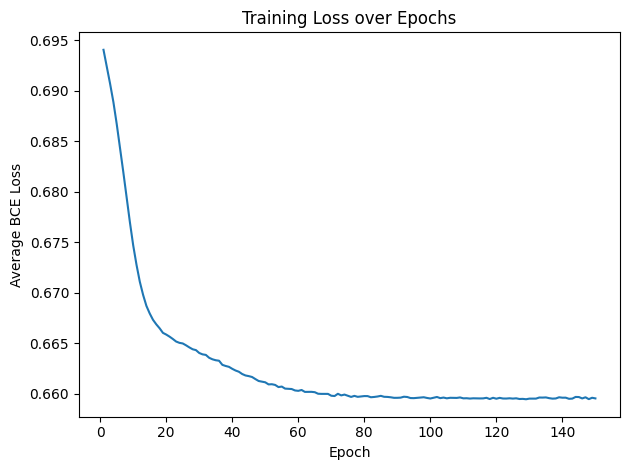

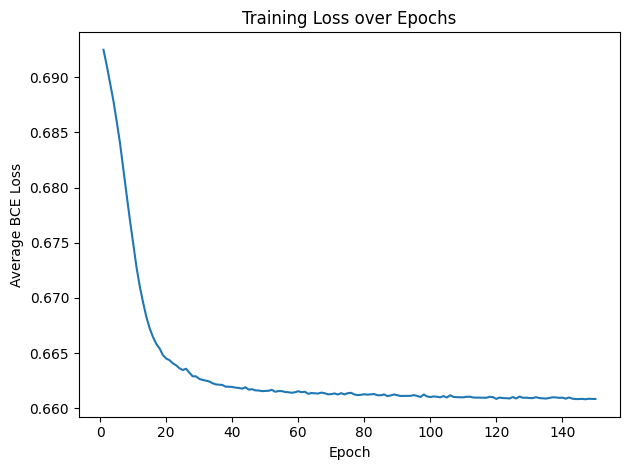

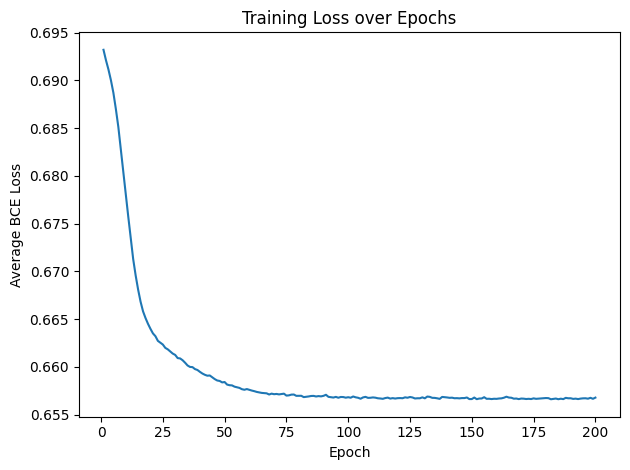

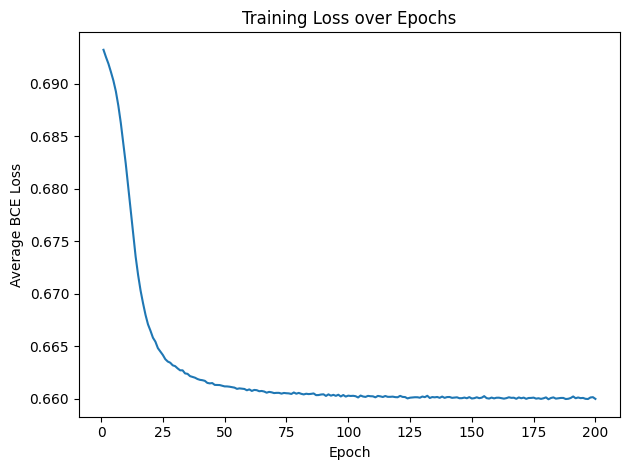

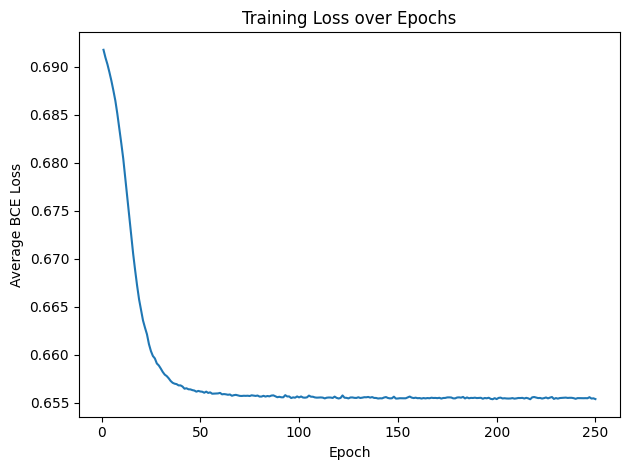

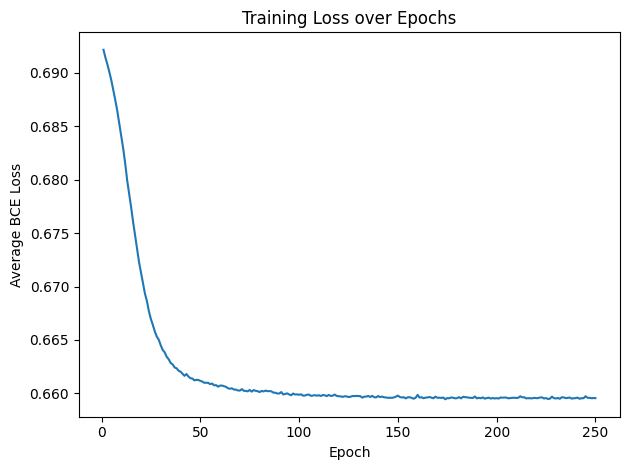

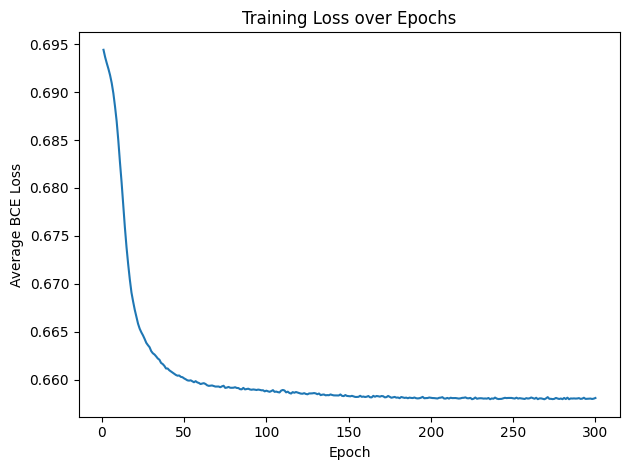

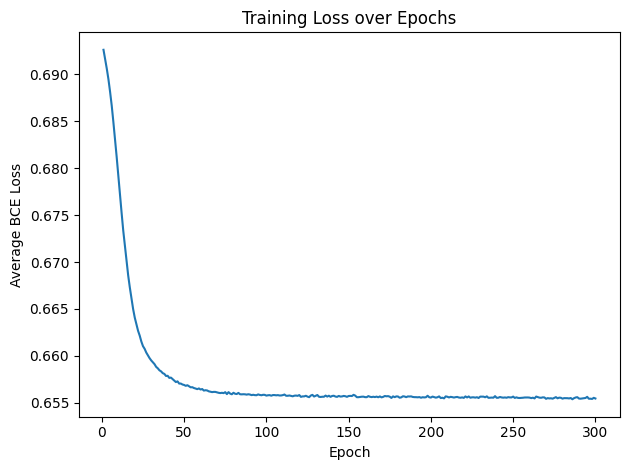

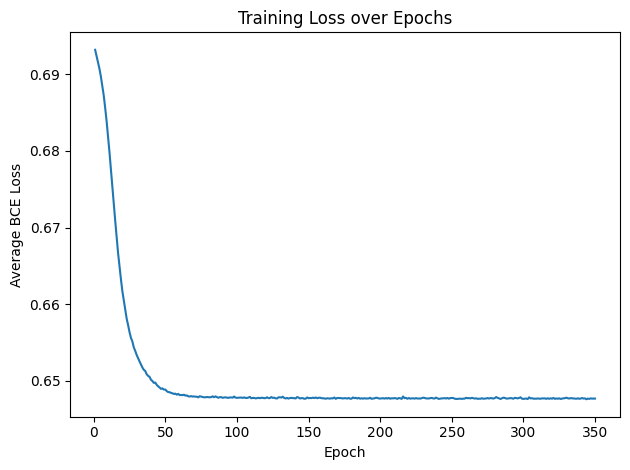

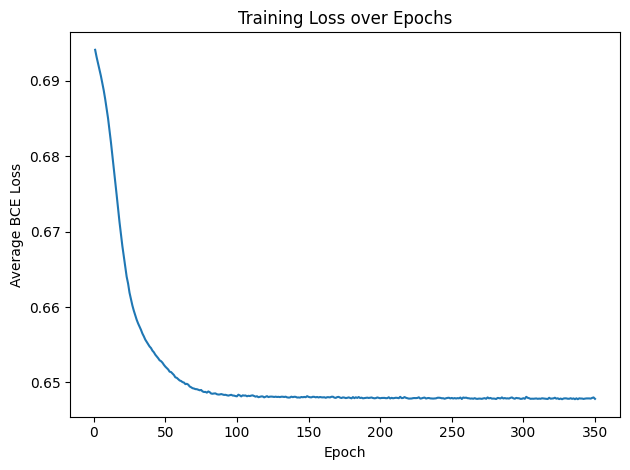

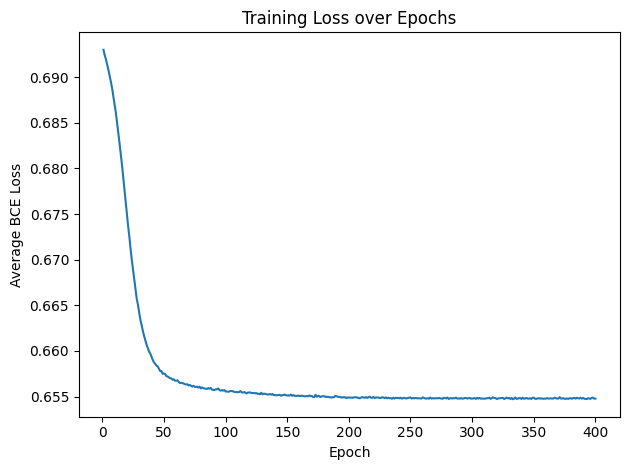

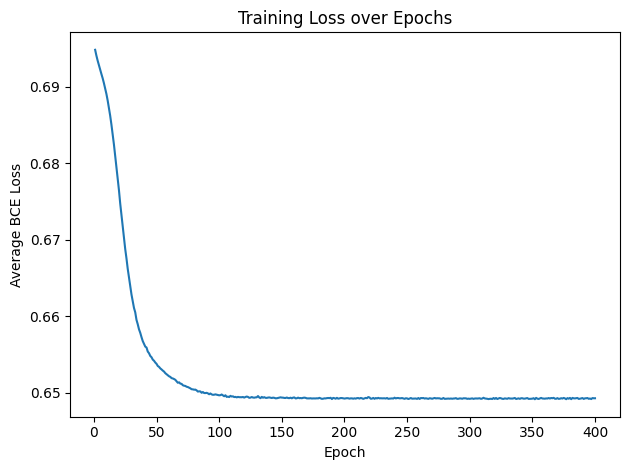

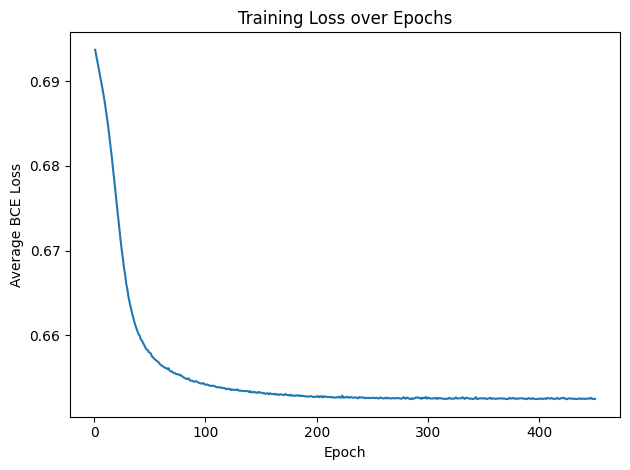

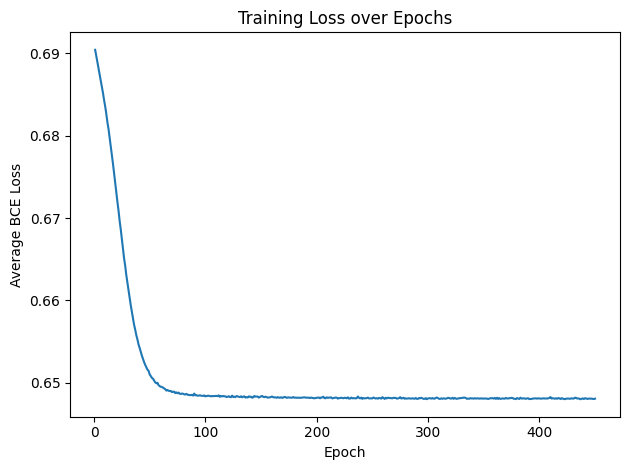

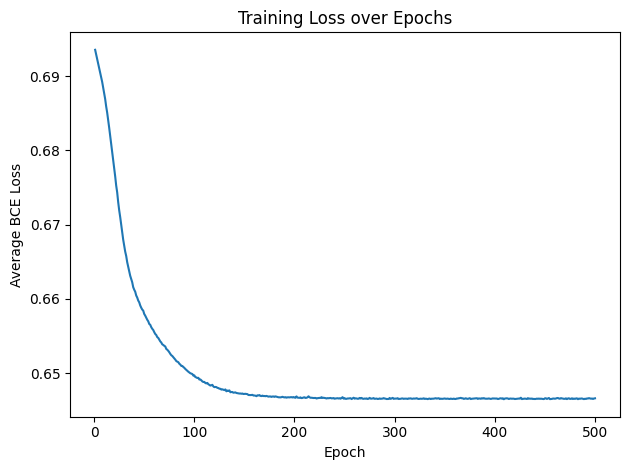

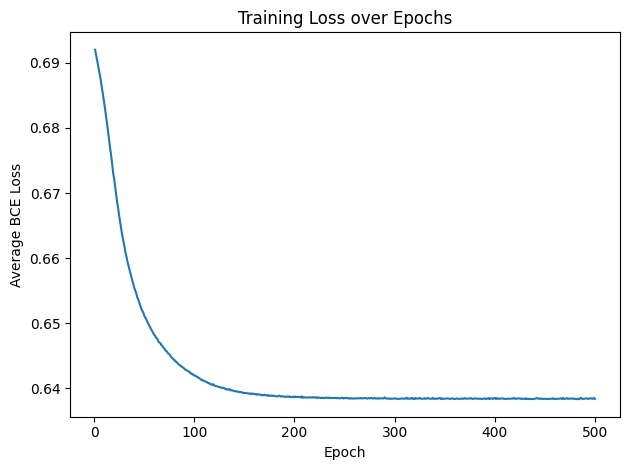

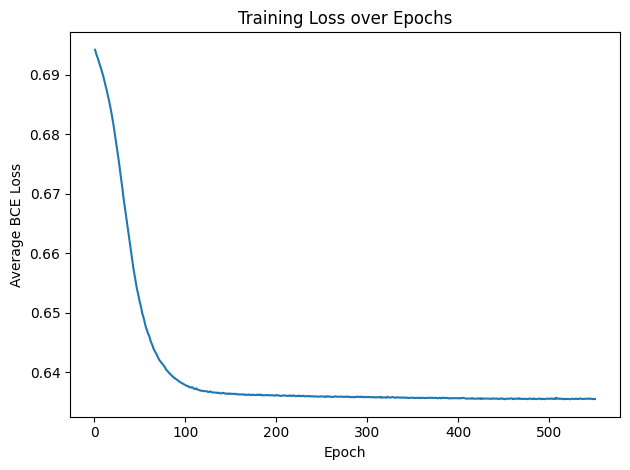

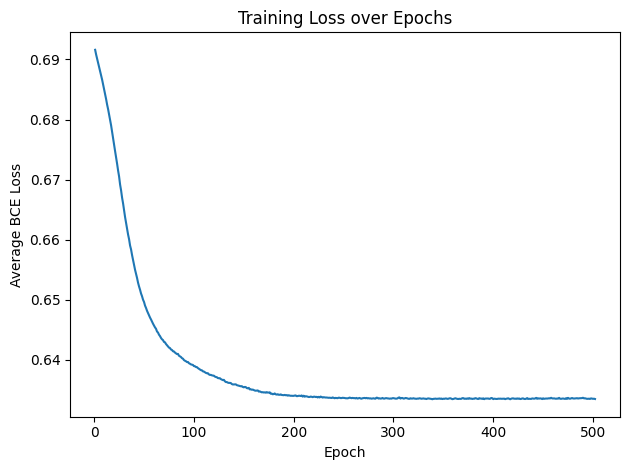

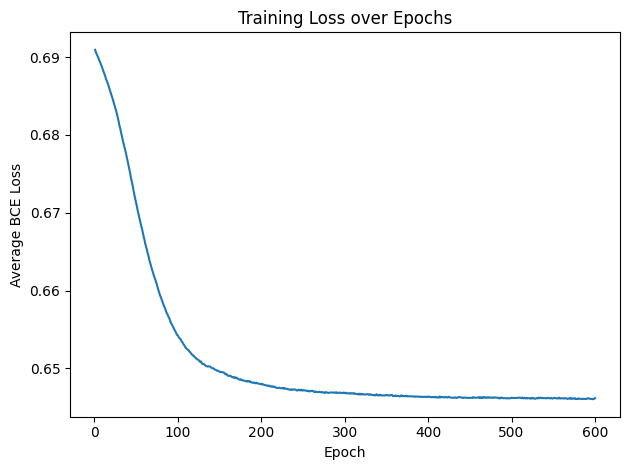

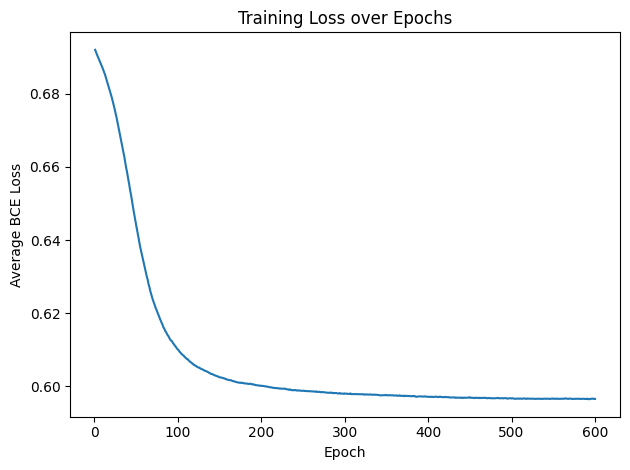

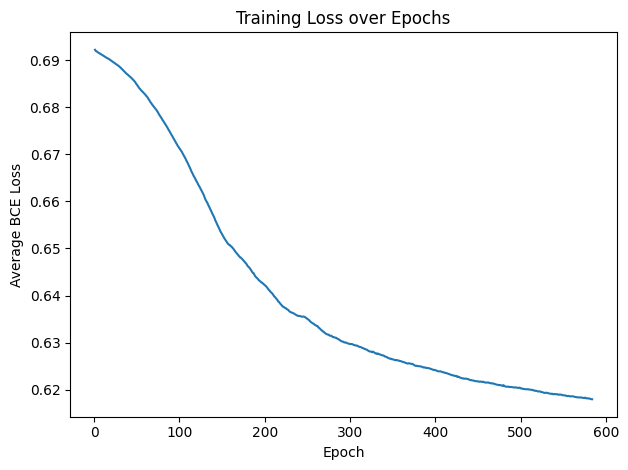

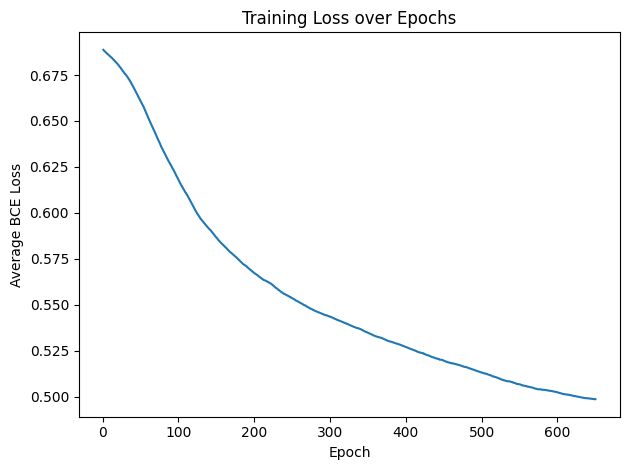

In [8]:
trust_matrix_dists = []

for n in [1200,1100,1000,900,800,700,600,500,400,300,200,100]:
    print(f'now testing samples with n={n}')
    sample1 = datasplit_1[:n]
    sample2 = datasplit_2[:n]

    S1,C1 = train_trust_matrix(sample1, epochs=int(700-n/2))
    t1 = eigentrust(C1, alpha=0)
    S2,C2 = train_trust_matrix(sample2, epochs=int(700-n/2))
    t2 = eigentrust(C2, alpha=0)

    trust_matrix_dists.append([n,
                               S1.cpu().numpy(),
                               C1.cpu().numpy(),
                               t1.cpu().numpy(),
                               S2.cpu().numpy(),
                               C2.cpu().numpy(),
                               t2.cpu().numpy()])

In [20]:
lists=[]
for i in range(len(trust_matrix_dists)):
    k=[trust_matrix_dists[i][0]]

    for j in range(1,7):
        k.append(trust_matrix_dists[i][j].tolist())
    lists.append(k)

In [22]:
with open("trust_matrix_dists.json", "w") as file:
    json.dump(lists, file, indent=4)

In [6]:
import json
data=[]
with open("figures/5_13_25/trust_matrices.json",'r') as file:
    data = json.load(file)

data2=[]
for i in range(len(data)):
    k=[data[i][0]]

    for j in range(1,7):
        k.append(np.array(data[i][j]))
    data2.append(k)

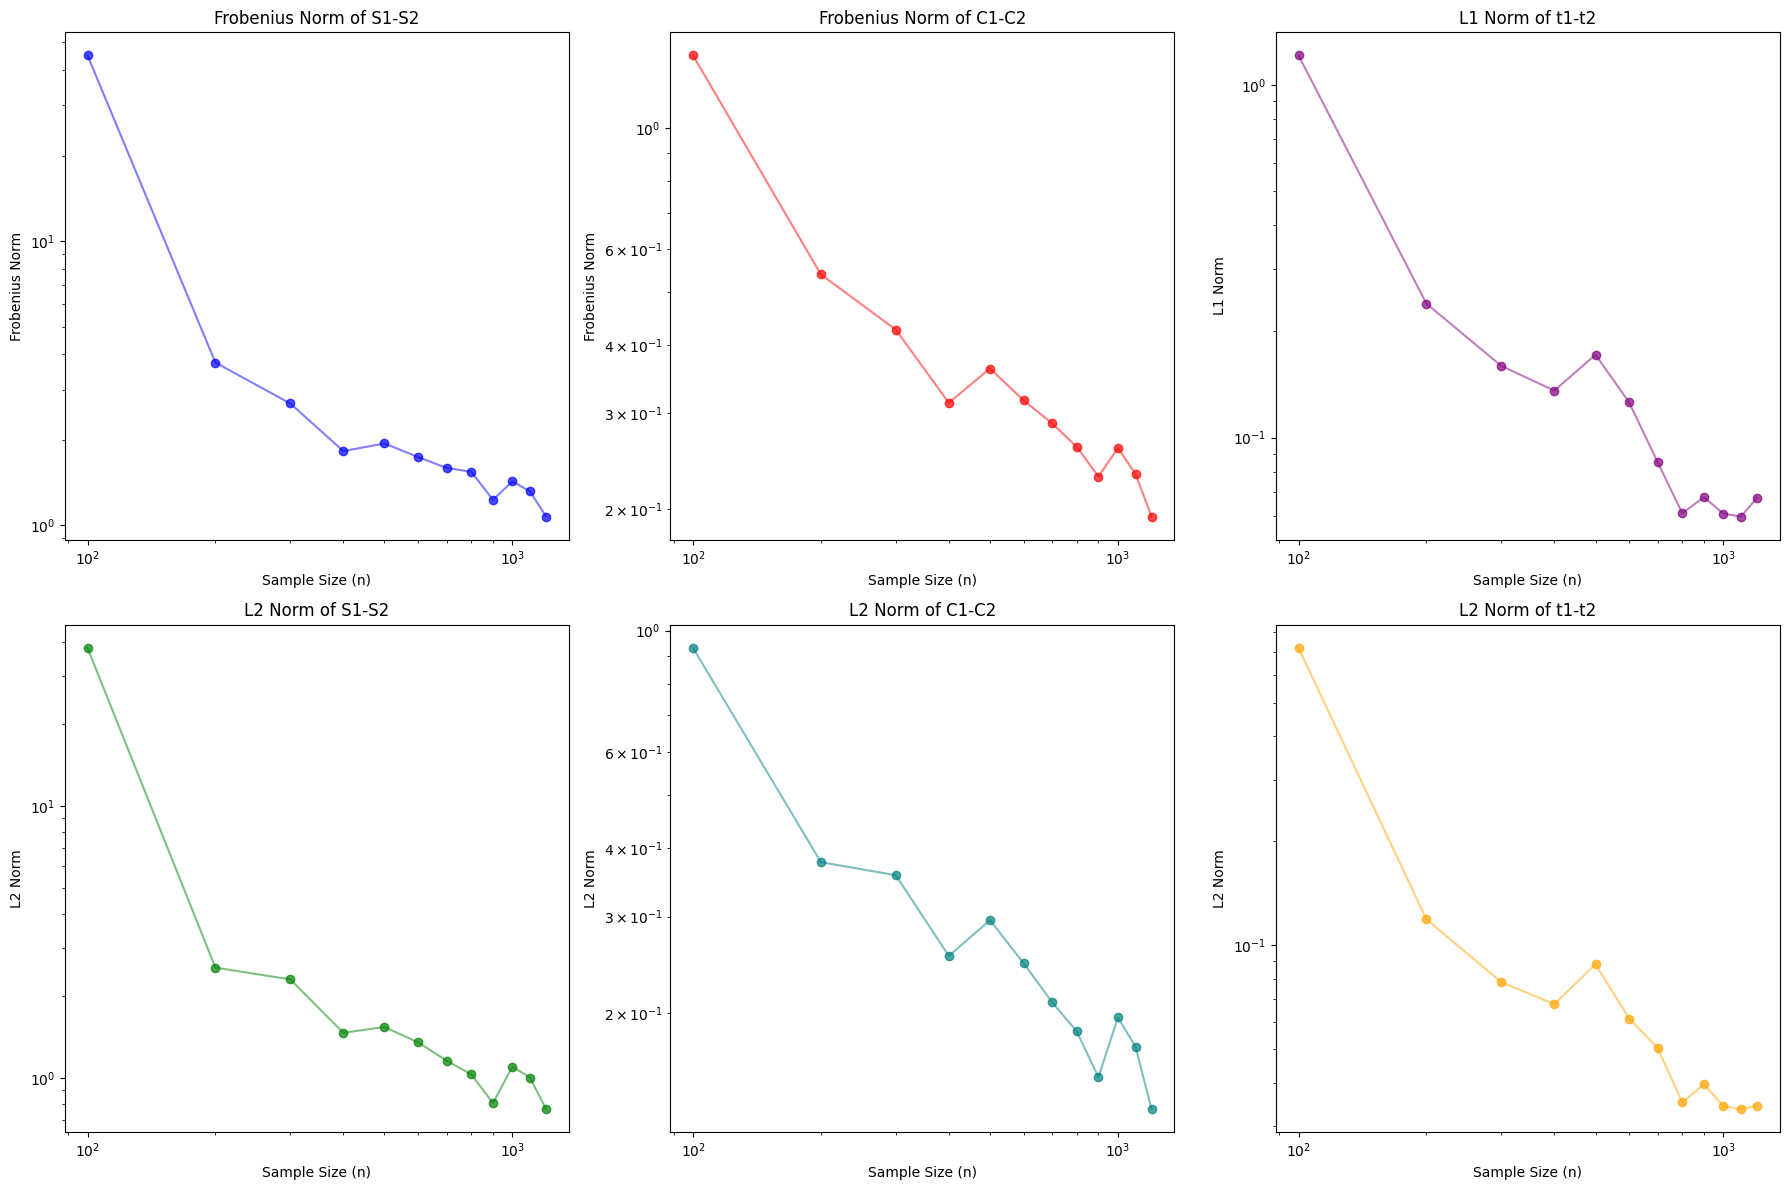

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import norm

# Create separate lists for each metric you want to plot
frob_norm_S_data = []
l2_norm_S_data = []
frob_norm_C_data = []
l2_norm_C_data = []
l1_norm_t_data = []
l2_norm_t_data = []

# Process the trust_matrix_dists
for i in range(len(data2)):
    a = data2[i]
    n = a[0]    # sample size
    S1 = a[1]   # first S matrix
    C1 = a[2]   # first C matrix
    t1 = a[3]   # first t vector
    S2 = a[4]   # second S matrix
    C2 = a[5]   # second C matrix
    t2 = a[6]   # second t vector
    
    # Frobenius norm of S1-S2
    frob_norm_S = norm(S1-S2, 'fro')
    frob_norm_S_data.append((n, frob_norm_S))
    
    # L2 norm of S1-S2 (spectral norm)
    l2_norm_S = norm(S1-S2, 2)
    l2_norm_S_data.append((n, l2_norm_S))
    
    # Frobenius norm of C1-C2
    frob_norm_C = norm(C1-C2, 'fro')
    frob_norm_C_data.append((n, frob_norm_C))
    
    # L2 norm of C1-C2
    l2_norm_C = norm(C1-C2, 2)
    l2_norm_C_data.append((n, l2_norm_C))
    
    # L1 norm of t1-t2
    l1_norm_t = norm(t1-t2, 1)
    l1_norm_t_data.append((n, l1_norm_t))
    
    # L2 norm of t1-t2
    l2_norm_t = norm(t1-t2, 2)
    l2_norm_t_data.append((n, l2_norm_t))

# Create a single figure with six plots in a 2x3 layout
plt.figure(figsize=(18, 12))  # Adjusted for 2x3 layout

# 1. Frobenius Norm of S1-S2
plt.subplot(2, 3, 1)
n_values, norm_values = zip(*sorted(frob_norm_S_data, key=lambda x: x[0]))
plt.scatter(n_values, norm_values, color='blue', alpha=0.7)
plt.plot(n_values, norm_values, color='blue', alpha=0.5)
plt.title('Frobenius Norm of S1-S2')
plt.xlabel('Sample Size (n)')
plt.ylabel('Frobenius Norm')
plt.xscale('log')
plt.yscale('log')

# 2. L2 Norm of S1-S2
plt.subplot(2, 3, 4)
n_values, norm_values = zip(*sorted(l2_norm_S_data, key=lambda x: x[0]))
plt.scatter(n_values, norm_values, color='green', alpha=0.7)
plt.plot(n_values, norm_values, color='green', alpha=0.5)
plt.title('L2 Norm of S1-S2')
plt.xlabel('Sample Size (n)')
plt.ylabel('L2 Norm')
plt.xscale('log')
plt.yscale('log')

# 3. Frobenius Norm of C1-C2
plt.subplot(2, 3, 2)
n_values, norm_values = zip(*sorted(frob_norm_C_data, key=lambda x: x[0]))
plt.scatter(n_values, norm_values, color='red', alpha=0.7)
plt.plot(n_values, norm_values, color='red', alpha=0.5)
plt.title('Frobenius Norm of C1-C2')
plt.xlabel('Sample Size (n)')
plt.ylabel('Frobenius Norm')
plt.xscale('log')
plt.yscale('log')

# 4. L2 Norm of C1-C2
plt.subplot(2, 3, 5)
n_values, norm_values = zip(*sorted(l2_norm_C_data, key=lambda x: x[0]))
plt.scatter(n_values, norm_values, color='teal', alpha=0.7)
plt.plot(n_values, norm_values, color='teal', alpha=0.5)
plt.title('L2 Norm of C1-C2')
plt.xlabel('Sample Size (n)')
plt.ylabel('L2 Norm')
plt.xscale('log')
plt.yscale('log')

# 5. L1 Norm of t1-t2
plt.subplot(2, 3, 3)
n_values, norm_values = zip(*sorted(l1_norm_t_data, key=lambda x: x[0]))
plt.scatter(n_values, norm_values, color='purple', alpha=0.7)
plt.plot(n_values, norm_values, color='purple', alpha=0.5)
plt.title('L1 Norm of t1-t2')
plt.xlabel('Sample Size (n)')
plt.ylabel('L1 Norm')
plt.xscale('log')
plt.yscale('log')

# 6. L2 Norm of t1-t2
plt.subplot(2, 3, 6)
n_values, norm_values = zip(*sorted(l2_norm_t_data, key=lambda x: x[0]))
plt.scatter(n_values, norm_values, color='orange', alpha=0.7)
plt.plot(n_values, norm_values, color='orange', alpha=0.5)
plt.title('L2 Norm of t1-t2')
plt.xlabel('Sample Size (n)')
plt.ylabel('L2 Norm')
plt.xscale('log')
plt.yscale('log')

plt.tight_layout()
plt.savefig('figures/norm_comparisons.png', dpi=300)  # Optional: Save the figure
plt.show()

### Testing omission of triples

In [20]:
data_without_self=[]
for item in data:
    eval1 = item['eval1']
    eval2 = item['eval2']
    judge = item['judge']

    if judge!=eval1 and judge!=eval2:
        data_without_self.append(item)

In [21]:
len(data_without_self)

1412

Epoch  10, Loss = 0.6679
Epoch  20, Loss = 0.6659
Epoch  30, Loss = 0.6655
Epoch  40, Loss = 0.6654
Epoch  50, Loss = 0.6652
Epoch  60, Loss = 0.6652
Epoch  70, Loss = 0.6651
Epoch  80, Loss = 0.6651
Epoch  90, Loss = 0.6649
Epoch 100, Loss = 0.6649
Epoch 110, Loss = 0.6649
Epoch 120, Loss = 0.6649
Epoch 130, Loss = 0.6649
Epoch 140, Loss = 0.6649
Epoch 150, Loss = 0.6650
Starting eigentrust iteration


  0%|          | 5/1000 [00:00<00:05, 173.47it/s]


Epoch  10, Loss = 0.6732
Epoch  20, Loss = 0.6694
Epoch  30, Loss = 0.6687
Epoch  40, Loss = 0.6683
Epoch  50, Loss = 0.6680
Epoch  60, Loss = 0.6678
Epoch  70, Loss = 0.6677
Epoch  80, Loss = 0.6678
Epoch  90, Loss = 0.6677
Epoch 100, Loss = 0.6676
Epoch 110, Loss = 0.6676
Epoch 120, Loss = 0.6676
Epoch 130, Loss = 0.6675
Epoch 140, Loss = 0.6675
Epoch 150, Loss = 0.6676
Epoch 160, Loss = 0.6674
Epoch 170, Loss = 0.6676
Epoch 180, Loss = 0.6674
Epoch 190, Loss = 0.6674
Epoch 200, Loss = 0.6675
Starting eigentrust iteration


  0%|          | 4/1000 [00:00<00:02, 334.67it/s]


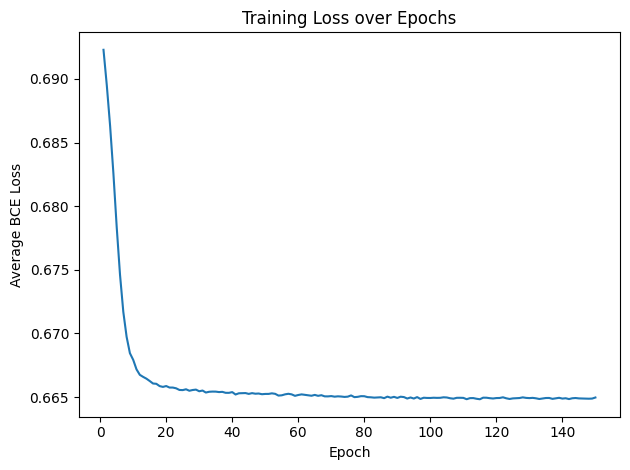

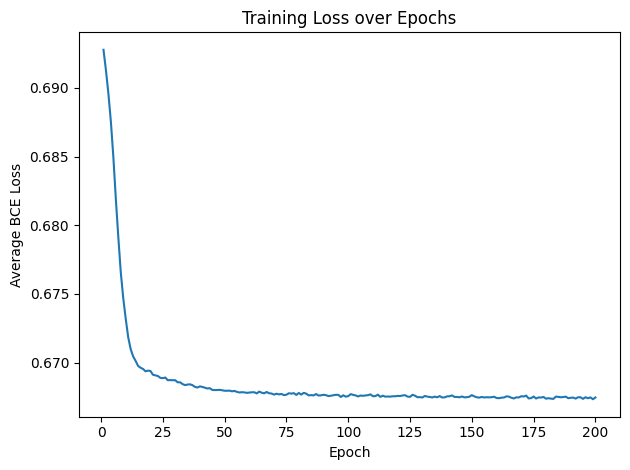

In [26]:
S,C = train_trust_matrix(data, epochs=150)
t = eigentrust(C, alpha=0)

S1,C1 = train_trust_matrix(data_without_self, epochs=200)
t1 = eigentrust(C1, alpha=0)

In [29]:
log_path = f'eigentrust1.txt'
with open(log_path, 'w') as f:
    f.write("Trust matrix:\n")
    f.write(str(S1.cpu().numpy())+"\n")
    f.write("Row-normalized:\n")
    f.write(str(C1.cpu().numpy())+"\n")
    f.write("EigenTrust scores:\n")
    f.write(str(t1.cpu().numpy())+"\n")

In [ ]:
from numpy.linalg import norm

## Power law on new data 5/13

In [42]:
from BT import *
import json
import numpy as np
from eigentrust import *
import random

In [43]:
data_path = '20250513_224000'
data = []
filepath = f'transcript/{data_path}/evaluations_cleaned.json'
with open(filepath, 'r') as file:
    data.extend(json.load(file))
len(data)

22629

In [46]:
comparisons = []

for i, item in enumerate(data):
    response = item['judge response']
    m = re.search(r'<choice>(.)</choice>', response)
    if m:
        score = int(m.group(1))
        comparisons.append([item['judge'], item['eval1'], item['eval2'], score])

In [44]:
func = {'(0, 0)': 0,
        '(0, 1)': 1,
        '(0, 2)': 2,
        '(0, 3)': 3,
        '(0, 4)': 4,
        '(1, 0)': 5,
        '(1, 1)': 6,
        '(1, 2)': 7,
        '(1, 3)': 8,
        '(1, 4)': 9,
        '(2, 0)': 10,
        '(2, 1)': 11,
        '(2, 2)': 12,
        '(2, 3)': 13,
        '(2, 4)': 14,
        '(3, 0)': 15,
        '(3, 1)': 16,
        '(3, 2)': 17,
        '(3, 3)': 18,
        '(3, 4)': 19,
        '(4, 0)': 20,
        '(4, 1)': 21,
        '(4, 2)': 22,
        '(4, 3)': 23,
        '(4, 4)': 24,}

In [47]:
mapped_comparisons = []
for item in comparisons:
    l = [func[x] for x in item[:3]]
    l.append(item[3])
    mapped_comparisons.append(l)

In [49]:
split = int(len(mapped_comparisons)/2)
datasplit_1 = mapped_comparisons[:split]
datasplit_2 = mapped_comparisons[split:]
print(len(datasplit_1), len(datasplit_2))

11314 11315


In [54]:
def train_trust_matrix(data,epochs):

    batch_size=32
    dataset = PairwiseDataset(data)
    dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

    num_models = 25
    d = 6

    lr = 1e-3
    weight_decay = 1e-4
    max_epochs = epochs

    model = VectorBT(num_models, d)
    train_vector_bt(
        model, 
        dataloader,
        lr=lr, 
        weight_decay=weight_decay,
        max_epochs=max_epochs, 
        device='mps'
    )

    device = 'mps'
    S = compute_trust_matrix(model, device)
    C = row_normalize(S)

    return S,C

now testing samples with n=10500 for 142 epochs
Epoch  10, Loss = 0.5462
Epoch  20, Loss = 0.5378
Epoch  30, Loss = 0.5350
Epoch  40, Loss = 0.5333
Epoch  50, Loss = 0.5321
Epoch  60, Loss = 0.5314
Epoch  70, Loss = 0.5309
Epoch  80, Loss = 0.5304
Epoch  90, Loss = 0.5303
Epoch 100, Loss = 0.5301
Epoch 110, Loss = 0.5300
Epoch 120, Loss = 0.5300
Epoch 130, Loss = 0.5299
Epoch 140, Loss = 0.5298
Starting eigentrust iteration


  1%|          | 10/1000 [00:00<00:01, 821.91it/s]


Epoch  10, Loss = 0.5427
Epoch  20, Loss = 0.5363
Epoch  30, Loss = 0.5326
Epoch  40, Loss = 0.5300
Epoch  50, Loss = 0.5287
Epoch  60, Loss = 0.5279
Epoch  70, Loss = 0.5274
Epoch  80, Loss = 0.5271
Epoch  90, Loss = 0.5267
Epoch 100, Loss = 0.5264
Epoch 110, Loss = 0.5262
Epoch 120, Loss = 0.5261
Epoch 130, Loss = 0.5260
Epoch 140, Loss = 0.5259
Starting eigentrust iteration


  1%|          | 9/1000 [00:00<00:00, 1266.35it/s]

now testing samples with n=10000 for 185 epochs


Epoch  10, Loss = 0.5541
Epoch  20, Loss = 0.5383
Epoch  30, Loss = 0.5341
Epoch  40, Loss = 0.5319
Epoch  50, Loss = 0.5306
Epoch  60, Loss = 0.5299
Epoch  70, Loss = 0.5296
Epoch  80, Loss = 0.5293
Epoch  90, Loss = 0.5291
Epoch 100, Loss = 0.5290
Epoch 110, Loss = 0.5290
Epoch 120, Loss = 0.5289
Epoch 130, Loss = 0.5288
Epoch 140, Loss = 0.5287
Epoch 150, Loss = 0.5287
Epoch 160, Loss = 0.5287
Epoch 170, Loss = 0.5287
Epoch 180, Loss = 0.5287
Starting eigentrust iteration


  1%|          | 11/1000 [00:00<00:00, 1634.51it/s]


Epoch  10, Loss = 0.5426
Epoch  20, Loss = 0.5344
Epoch  30, Loss = 0.5313
Epoch  40, Loss = 0.5296
Epoch  50, Loss = 0.5286
Epoch  60, Loss = 0.5279
Epoch  70, Loss = 0.5275
Epoch  80, Loss = 0.5272
Epoch  90, Loss = 0.5270
Epoch 100, Loss = 0.5269
Epoch 110, Loss = 0.5268
Epoch 120, Loss = 0.5267
Epoch 130, Loss = 0.5265
Epoch 140, Loss = 0.5265
Epoch 150, Loss = 0.5264
Epoch 160, Loss = 0.5263
Epoch 170, Loss = 0.5263
Epoch 180, Loss = 0.5261
Starting eigentrust iteration


  1%|          | 8/1000 [00:00<00:00, 1325.42it/s]

now testing samples with n=9500 for 228 epochs


Epoch  10, Loss = 0.5484
Epoch  20, Loss = 0.5355
Epoch  30, Loss = 0.5310
Epoch  40, Loss = 0.5289
Epoch  50, Loss = 0.5278
Epoch  60, Loss = 0.5271
Epoch  70, Loss = 0.5268
Epoch  80, Loss = 0.5265
Epoch  90, Loss = 0.5264
Epoch 100, Loss = 0.5262
Epoch 110, Loss = 0.5261
Epoch 120, Loss = 0.5261
Epoch 130, Loss = 0.5260
Epoch 140, Loss = 0.5260
Epoch 150, Loss = 0.5259
Epoch 160, Loss = 0.5259
Epoch 170, Loss = 0.5259
Epoch 180, Loss = 0.5259
Epoch 190, Loss = 0.5258
Epoch 200, Loss = 0.5259
Epoch 210, Loss = 0.5258
Epoch 220, Loss = 0.5259
Starting eigentrust iteration


  1%|          | 11/1000 [00:00<00:00, 1010.21it/s]


Epoch  10, Loss = 0.5432
Epoch  20, Loss = 0.5355
Epoch  30, Loss = 0.5308
Epoch  40, Loss = 0.5279
Epoch  50, Loss = 0.5264
Epoch  60, Loss = 0.5257
Epoch  70, Loss = 0.5252
Epoch  80, Loss = 0.5249
Epoch  90, Loss = 0.5247
Epoch 100, Loss = 0.5246
Epoch 110, Loss = 0.5245
Epoch 120, Loss = 0.5243
Epoch 130, Loss = 0.5243
Epoch 140, Loss = 0.5242
Epoch 150, Loss = 0.5242
Epoch 160, Loss = 0.5242
Epoch 170, Loss = 0.5241
Epoch 180, Loss = 0.5241
Epoch 190, Loss = 0.5241
Epoch 200, Loss = 0.5241
Epoch 210, Loss = 0.5240
Epoch 220, Loss = 0.5241
Starting eigentrust iteration


  1%|          | 9/1000 [00:00<00:00, 1283.27it/s]

now testing samples with n=9000 for 271 epochs


Epoch  10, Loss = 0.5514
Epoch  20, Loss = 0.5374
Epoch  30, Loss = 0.5339
Epoch  40, Loss = 0.5316
Epoch  50, Loss = 0.5298
Epoch  60, Loss = 0.5287
Epoch  70, Loss = 0.5279
Epoch  80, Loss = 0.5275
Epoch  90, Loss = 0.5271
Epoch 100, Loss = 0.5270
Epoch 110, Loss = 0.5268
Epoch 120, Loss = 0.5267
Epoch 130, Loss = 0.5267
Epoch 140, Loss = 0.5266
Epoch 150, Loss = 0.5265
Epoch 160, Loss = 0.5265
Epoch 170, Loss = 0.5265
Epoch 180, Loss = 0.5265
Epoch 190, Loss = 0.5265
Epoch 200, Loss = 0.5264
Epoch 210, Loss = 0.5264
Epoch 220, Loss = 0.5264
Epoch 230, Loss = 0.5264
Epoch 240, Loss = 0.5263
Epoch 250, Loss = 0.5264
Epoch 260, Loss = 0.5263
Epoch 270, Loss = 0.5264
Starting eigentrust iteration


  1%|          | 11/1000 [00:00<00:00, 1326.28it/s]


Epoch  10, Loss = 0.5424
Epoch  20, Loss = 0.5328
Epoch  30, Loss = 0.5283
Epoch  40, Loss = 0.5260
Epoch  50, Loss = 0.5248
Epoch  60, Loss = 0.5241
Epoch  70, Loss = 0.5238
Epoch  80, Loss = 0.5235
Epoch  90, Loss = 0.5233
Epoch 100, Loss = 0.5231
Epoch 110, Loss = 0.5230
Epoch 120, Loss = 0.5229
Epoch 130, Loss = 0.5228
Epoch 140, Loss = 0.5227
Epoch 150, Loss = 0.5225
Epoch 160, Loss = 0.5224
Epoch 170, Loss = 0.5223
Epoch 180, Loss = 0.5222
Epoch 190, Loss = 0.5222
Epoch 200, Loss = 0.5220
Epoch 210, Loss = 0.5219
Epoch 220, Loss = 0.5218
Epoch 230, Loss = 0.5217
Epoch 240, Loss = 0.5216
Epoch 250, Loss = 0.5216
Epoch 260, Loss = 0.5215
Epoch 270, Loss = 0.5215
Starting eigentrust iteration


  1%|          | 8/1000 [00:00<00:00, 1051.40it/s]

now testing samples with n=8500 for 314 epochs


Epoch  10, Loss = 0.5489
Epoch  20, Loss = 0.5362
Epoch  30, Loss = 0.5312
Epoch  40, Loss = 0.5287
Epoch  50, Loss = 0.5274
Epoch  60, Loss = 0.5266
Epoch  70, Loss = 0.5261
Epoch  80, Loss = 0.5258
Epoch  90, Loss = 0.5255
Epoch 100, Loss = 0.5254
Epoch 110, Loss = 0.5253
Epoch 120, Loss = 0.5251
Epoch 130, Loss = 0.5251
Epoch 140, Loss = 0.5250
Epoch 150, Loss = 0.5249
Epoch 160, Loss = 0.5249
Epoch 170, Loss = 0.5247
Epoch 180, Loss = 0.5247
Epoch 190, Loss = 0.5247
Epoch 200, Loss = 0.5246
Epoch 210, Loss = 0.5245
Epoch 220, Loss = 0.5244
Epoch 230, Loss = 0.5245
Epoch 240, Loss = 0.5244
Epoch 250, Loss = 0.5244
Epoch 260, Loss = 0.5243
Epoch 270, Loss = 0.5243
Epoch 280, Loss = 0.5242
Epoch 290, Loss = 0.5242
Epoch 300, Loss = 0.5241
Epoch 310, Loss = 0.5241
Starting eigentrust iteration


  1%|          | 12/1000 [00:00<00:00, 1462.11it/s]


Epoch  10, Loss = 0.5484
Epoch  20, Loss = 0.5362
Epoch  30, Loss = 0.5308
Epoch  40, Loss = 0.5278
Epoch  50, Loss = 0.5259
Epoch  60, Loss = 0.5245
Epoch  70, Loss = 0.5234
Epoch  80, Loss = 0.5227
Epoch  90, Loss = 0.5219
Epoch 100, Loss = 0.5215
Epoch 110, Loss = 0.5212
Epoch 120, Loss = 0.5208
Epoch 130, Loss = 0.5206
Epoch 140, Loss = 0.5205
Epoch 150, Loss = 0.5204
Epoch 160, Loss = 0.5203
Epoch 170, Loss = 0.5202
Epoch 180, Loss = 0.5202
Epoch 190, Loss = 0.5203
Epoch 200, Loss = 0.5201
Epoch 210, Loss = 0.5201
Epoch 220, Loss = 0.5201
Epoch 230, Loss = 0.5201
Epoch 240, Loss = 0.5201
Epoch 250, Loss = 0.5201
Epoch 260, Loss = 0.5200
Epoch 270, Loss = 0.5200
Epoch 280, Loss = 0.5200
Epoch 290, Loss = 0.5200
Epoch 300, Loss = 0.5199
Epoch 310, Loss = 0.5200
Starting eigentrust iteration


  1%|          | 9/1000 [00:00<00:00, 1229.52it/s]

now testing samples with n=8000 for 357 epochs


Epoch  10, Loss = 0.5534
Epoch  20, Loss = 0.5392
Epoch  30, Loss = 0.5332
Epoch  40, Loss = 0.5293
Epoch  50, Loss = 0.5266
Epoch  60, Loss = 0.5252
Epoch  70, Loss = 0.5244
Epoch  80, Loss = 0.5239
Epoch  90, Loss = 0.5236
Epoch 100, Loss = 0.5233
Epoch 110, Loss = 0.5232
Epoch 120, Loss = 0.5230
Epoch 130, Loss = 0.5230
Epoch 140, Loss = 0.5229
Epoch 150, Loss = 0.5229
Epoch 160, Loss = 0.5228
Epoch 170, Loss = 0.5228
Epoch 180, Loss = 0.5227
Epoch 190, Loss = 0.5228
Epoch 200, Loss = 0.5228
Epoch 210, Loss = 0.5228
Epoch 220, Loss = 0.5227
Epoch 230, Loss = 0.5227
Epoch 240, Loss = 0.5227
Epoch 250, Loss = 0.5227
Epoch 260, Loss = 0.5227
Epoch 270, Loss = 0.5227
Epoch 280, Loss = 0.5227
Epoch 290, Loss = 0.5227
Epoch 300, Loss = 0.5227
Epoch 310, Loss = 0.5227
Epoch 320, Loss = 0.5227
Epoch 330, Loss = 0.5227
Epoch 340, Loss = 0.5227
Epoch 350, Loss = 0.5227
Starting eigentrust iteration


  1%|▏         | 13/1000 [00:00<00:00, 1395.28it/s]


Epoch  10, Loss = 0.5466
Epoch  20, Loss = 0.5327
Epoch  30, Loss = 0.5267
Epoch  40, Loss = 0.5239
Epoch  50, Loss = 0.5227
Epoch  60, Loss = 0.5220
Epoch  70, Loss = 0.5216
Epoch  80, Loss = 0.5214
Epoch  90, Loss = 0.5213
Epoch 100, Loss = 0.5212
Epoch 110, Loss = 0.5211
Epoch 120, Loss = 0.5210
Epoch 130, Loss = 0.5210
Epoch 140, Loss = 0.5210
Epoch 150, Loss = 0.5209
Epoch 160, Loss = 0.5209
Epoch 170, Loss = 0.5209
Epoch 180, Loss = 0.5208
Epoch 190, Loss = 0.5208
Epoch 200, Loss = 0.5208
Epoch 210, Loss = 0.5207
Epoch 220, Loss = 0.5208
Epoch 230, Loss = 0.5207
Epoch 240, Loss = 0.5208
Epoch 250, Loss = 0.5206
Epoch 260, Loss = 0.5208
Epoch 270, Loss = 0.5207
Epoch 280, Loss = 0.5207
Epoch 290, Loss = 0.5207
Epoch 300, Loss = 0.5207
Epoch 310, Loss = 0.5206
Epoch 320, Loss = 0.5206
Epoch 330, Loss = 0.5207
Epoch 340, Loss = 0.5207
Epoch 350, Loss = 0.5207
Starting eigentrust iteration


  1%|          | 9/1000 [00:00<00:00, 1429.93it/s]

now testing samples with n=7500 for 400 epochs


Epoch  10, Loss = 0.5544
Epoch  20, Loss = 0.5414
Epoch  30, Loss = 0.5343
Epoch  40, Loss = 0.5294
Epoch  50, Loss = 0.5267
Epoch  60, Loss = 0.5253
Epoch  70, Loss = 0.5246
Epoch  80, Loss = 0.5242
Epoch  90, Loss = 0.5239
Epoch 100, Loss = 0.5237
Epoch 110, Loss = 0.5235
Epoch 120, Loss = 0.5234
Epoch 130, Loss = 0.5233
Epoch 140, Loss = 0.5232
Epoch 150, Loss = 0.5232
Epoch 160, Loss = 0.5231
Epoch 170, Loss = 0.5231
Epoch 180, Loss = 0.5231
Epoch 190, Loss = 0.5230
Epoch 200, Loss = 0.5231
Epoch 210, Loss = 0.5231
Epoch 220, Loss = 0.5231
Epoch 230, Loss = 0.5230
Epoch 240, Loss = 0.5230
Epoch 250, Loss = 0.5230
Epoch 260, Loss = 0.5229
Epoch 270, Loss = 0.5230
Epoch 280, Loss = 0.5229
Epoch 290, Loss = 0.5229
Epoch 300, Loss = 0.5229
Epoch 310, Loss = 0.5228
Epoch 320, Loss = 0.5229
Epoch 330, Loss = 0.5228
Epoch 340, Loss = 0.5229
Epoch 350, Loss = 0.5228
Epoch 360, Loss = 0.5228
Epoch 370, Loss = 0.5228
Epoch 380, Loss = 0.5228
Epoch 390, Loss = 0.5227
Epoch 400, Loss = 0.5227


  1%|          | 11/1000 [00:00<00:00, 1478.67it/s]


Epoch  10, Loss = 0.5423
Epoch  20, Loss = 0.5314
Epoch  30, Loss = 0.5278
Epoch  40, Loss = 0.5252
Epoch  50, Loss = 0.5232
Epoch  60, Loss = 0.5221
Epoch  70, Loss = 0.5214
Epoch  80, Loss = 0.5210
Epoch  90, Loss = 0.5207
Epoch 100, Loss = 0.5205
Epoch 110, Loss = 0.5203
Epoch 120, Loss = 0.5202
Epoch 130, Loss = 0.5201
Epoch 140, Loss = 0.5201
Epoch 150, Loss = 0.5201
Epoch 160, Loss = 0.5199
Epoch 170, Loss = 0.5199
Epoch 180, Loss = 0.5199
Epoch 190, Loss = 0.5198
Epoch 200, Loss = 0.5198
Epoch 210, Loss = 0.5198
Epoch 220, Loss = 0.5196
Epoch 230, Loss = 0.5197
Epoch 240, Loss = 0.5197
Epoch 250, Loss = 0.5196
Epoch 260, Loss = 0.5196
Epoch 270, Loss = 0.5196
Epoch 280, Loss = 0.5196
Epoch 290, Loss = 0.5196
Epoch 300, Loss = 0.5196
Epoch 310, Loss = 0.5196
Epoch 320, Loss = 0.5195
Epoch 330, Loss = 0.5195
Epoch 340, Loss = 0.5195
Epoch 350, Loss = 0.5195
Epoch 360, Loss = 0.5195
Epoch 370, Loss = 0.5195
Epoch 380, Loss = 0.5194
Epoch 390, Loss = 0.5195
Epoch 400, Loss = 0.5194


  1%|          | 8/1000 [00:00<00:01, 893.97it/s]


now testing samples with n=7000 for 442 epochs
Epoch  10, Loss = 0.5464
Epoch  20, Loss = 0.5349
Epoch  30, Loss = 0.5298
Epoch  40, Loss = 0.5269
Epoch  50, Loss = 0.5253
Epoch  60, Loss = 0.5243
Epoch  70, Loss = 0.5234
Epoch  80, Loss = 0.5228
Epoch  90, Loss = 0.5224
Epoch 100, Loss = 0.5221
Epoch 110, Loss = 0.5218
Epoch 120, Loss = 0.5218
Epoch 130, Loss = 0.5215
Epoch 140, Loss = 0.5214
Epoch 150, Loss = 0.5212
Epoch 160, Loss = 0.5210
Epoch 170, Loss = 0.5210
Epoch 180, Loss = 0.5209
Epoch 190, Loss = 0.5208
Epoch 200, Loss = 0.5207
Epoch 210, Loss = 0.5206
Epoch 220, Loss = 0.5205
Epoch 230, Loss = 0.5205
Epoch 240, Loss = 0.5203
Epoch 250, Loss = 0.5204
Epoch 260, Loss = 0.5202
Epoch 270, Loss = 0.5202
Epoch 280, Loss = 0.5201
Epoch 290, Loss = 0.5201
Epoch 300, Loss = 0.5201
Epoch 310, Loss = 0.5201
Epoch 320, Loss = 0.5200
Epoch 330, Loss = 0.5200
Epoch 340, Loss = 0.5200
Epoch 350, Loss = 0.5199
Epoch 360, Loss = 0.5200
Epoch 370, Loss = 0.5199
Epoch 380, Loss = 0.5199
Epo

  1%|          | 12/1000 [00:00<00:00, 1176.44it/s]


Epoch  10, Loss = 0.5465
Epoch  20, Loss = 0.5371
Epoch  30, Loss = 0.5327
Epoch  40, Loss = 0.5295
Epoch  50, Loss = 0.5269
Epoch  60, Loss = 0.5248
Epoch  70, Loss = 0.5234
Epoch  80, Loss = 0.5223
Epoch  90, Loss = 0.5214
Epoch 100, Loss = 0.5207
Epoch 110, Loss = 0.5199
Epoch 120, Loss = 0.5193
Epoch 130, Loss = 0.5189
Epoch 140, Loss = 0.5185
Epoch 150, Loss = 0.5181
Epoch 160, Loss = 0.5178
Epoch 170, Loss = 0.5176
Epoch 180, Loss = 0.5174
Epoch 190, Loss = 0.5173
Epoch 200, Loss = 0.5172
Epoch 210, Loss = 0.5171
Epoch 220, Loss = 0.5170
Epoch 230, Loss = 0.5169
Epoch 240, Loss = 0.5169
Epoch 250, Loss = 0.5168
Epoch 260, Loss = 0.5168
Epoch 270, Loss = 0.5168
Epoch 280, Loss = 0.5168
Epoch 290, Loss = 0.5167
Epoch 300, Loss = 0.5167
Epoch 310, Loss = 0.5166
Epoch 320, Loss = 0.5166
Epoch 330, Loss = 0.5166
Epoch 340, Loss = 0.5166
Epoch 350, Loss = 0.5165
Epoch 360, Loss = 0.5165
Epoch 370, Loss = 0.5165
Epoch 380, Loss = 0.5165
Epoch 390, Loss = 0.5165
Epoch 400, Loss = 0.5165


  1%|          | 9/1000 [00:00<00:00, 1354.36it/s]

now testing samples with n=6500 for 485 epochs


Epoch  10, Loss = 0.5525
Epoch  20, Loss = 0.5386
Epoch  30, Loss = 0.5316
Epoch  40, Loss = 0.5269
Epoch  50, Loss = 0.5239
Epoch  60, Loss = 0.5220
Epoch  70, Loss = 0.5206
Epoch  80, Loss = 0.5198
Epoch  90, Loss = 0.5192
Epoch 100, Loss = 0.5189
Epoch 110, Loss = 0.5186
Epoch 120, Loss = 0.5183
Epoch 130, Loss = 0.5180
Epoch 140, Loss = 0.5179
Epoch 150, Loss = 0.5177
Epoch 160, Loss = 0.5175
Epoch 170, Loss = 0.5173
Epoch 180, Loss = 0.5172
Epoch 190, Loss = 0.5170
Epoch 200, Loss = 0.5168
Epoch 210, Loss = 0.5167
Epoch 220, Loss = 0.5166
Epoch 230, Loss = 0.5165
Epoch 240, Loss = 0.5164
Epoch 250, Loss = 0.5163
Epoch 260, Loss = 0.5163
Epoch 270, Loss = 0.5162
Epoch 280, Loss = 0.5162
Epoch 290, Loss = 0.5161
Epoch 300, Loss = 0.5161
Epoch 310, Loss = 0.5161
Epoch 320, Loss = 0.5161
Epoch 330, Loss = 0.5161
Epoch 340, Loss = 0.5160
Epoch 350, Loss = 0.5159
Epoch 360, Loss = 0.5160
Epoch 370, Loss = 0.5160
Epoch 380, Loss = 0.5160
Epoch 390, Loss = 0.5160
Epoch 400, Loss = 0.5160


  1%|          | 12/1000 [00:00<00:00, 1536.28it/s]


Epoch  10, Loss = 0.5502
Epoch  20, Loss = 0.5397
Epoch  30, Loss = 0.5319
Epoch  40, Loss = 0.5275
Epoch  50, Loss = 0.5246
Epoch  60, Loss = 0.5225
Epoch  70, Loss = 0.5213
Epoch  80, Loss = 0.5204
Epoch  90, Loss = 0.5198
Epoch 100, Loss = 0.5192
Epoch 110, Loss = 0.5188
Epoch 120, Loss = 0.5184
Epoch 130, Loss = 0.5180
Epoch 140, Loss = 0.5176
Epoch 150, Loss = 0.5173
Epoch 160, Loss = 0.5171
Epoch 170, Loss = 0.5167
Epoch 180, Loss = 0.5165
Epoch 190, Loss = 0.5163
Epoch 200, Loss = 0.5161
Epoch 210, Loss = 0.5159
Epoch 220, Loss = 0.5158
Epoch 230, Loss = 0.5157
Epoch 240, Loss = 0.5157
Epoch 250, Loss = 0.5156
Epoch 260, Loss = 0.5155
Epoch 270, Loss = 0.5154
Epoch 280, Loss = 0.5154
Epoch 290, Loss = 0.5154
Epoch 300, Loss = 0.5153
Epoch 310, Loss = 0.5153
Epoch 320, Loss = 0.5153
Epoch 330, Loss = 0.5152
Epoch 340, Loss = 0.5153
Epoch 350, Loss = 0.5153
Epoch 360, Loss = 0.5153
Epoch 370, Loss = 0.5153
Epoch 380, Loss = 0.5152
Epoch 390, Loss = 0.5153
Epoch 400, Loss = 0.5153


  1%|          | 9/1000 [00:00<00:00, 1229.72it/s]

now testing samples with n=6000 for 528 epochs


Epoch  10, Loss = 0.5475
Epoch  20, Loss = 0.5335
Epoch  30, Loss = 0.5273
Epoch  40, Loss = 0.5231
Epoch  50, Loss = 0.5204
Epoch  60, Loss = 0.5188
Epoch  70, Loss = 0.5179
Epoch  80, Loss = 0.5173
Epoch  90, Loss = 0.5167
Epoch 100, Loss = 0.5163
Epoch 110, Loss = 0.5160
Epoch 120, Loss = 0.5157
Epoch 130, Loss = 0.5154
Epoch 140, Loss = 0.5151
Epoch 150, Loss = 0.5149
Epoch 160, Loss = 0.5147
Epoch 170, Loss = 0.5144
Epoch 180, Loss = 0.5143
Epoch 190, Loss = 0.5142
Epoch 200, Loss = 0.5141
Epoch 210, Loss = 0.5138
Epoch 220, Loss = 0.5137
Epoch 230, Loss = 0.5136
Epoch 240, Loss = 0.5135
Epoch 250, Loss = 0.5133
Epoch 260, Loss = 0.5133
Epoch 270, Loss = 0.5131
Epoch 280, Loss = 0.5130
Epoch 290, Loss = 0.5129
Epoch 300, Loss = 0.5129
Epoch 310, Loss = 0.5128
Epoch 320, Loss = 0.5127
Epoch 330, Loss = 0.5127
Epoch 340, Loss = 0.5127
Epoch 350, Loss = 0.5127
Epoch 360, Loss = 0.5127
Epoch 370, Loss = 0.5126
Epoch 380, Loss = 0.5126
Epoch 390, Loss = 0.5125
Epoch 400, Loss = 0.5126


  1%|▏         | 13/1000 [00:00<00:00, 1561.77it/s]


Epoch  10, Loss = 0.5453
Epoch  20, Loss = 0.5338
Epoch  30, Loss = 0.5287
Epoch  40, Loss = 0.5253
Epoch  50, Loss = 0.5230
Epoch  60, Loss = 0.5213
Epoch  70, Loss = 0.5201
Epoch  80, Loss = 0.5190
Epoch  90, Loss = 0.5182
Epoch 100, Loss = 0.5177
Epoch 110, Loss = 0.5172
Epoch 120, Loss = 0.5168
Epoch 130, Loss = 0.5164
Epoch 140, Loss = 0.5162
Epoch 150, Loss = 0.5159
Epoch 160, Loss = 0.5158
Epoch 170, Loss = 0.5155
Epoch 180, Loss = 0.5155
Epoch 190, Loss = 0.5153
Epoch 200, Loss = 0.5152
Epoch 210, Loss = 0.5151
Epoch 220, Loss = 0.5150
Epoch 230, Loss = 0.5149
Epoch 240, Loss = 0.5149
Epoch 250, Loss = 0.5148
Epoch 260, Loss = 0.5147
Epoch 270, Loss = 0.5146
Epoch 280, Loss = 0.5146
Epoch 290, Loss = 0.5146
Epoch 300, Loss = 0.5145
Epoch 310, Loss = 0.5145
Epoch 320, Loss = 0.5145
Epoch 330, Loss = 0.5145
Epoch 340, Loss = 0.5144
Epoch 350, Loss = 0.5144
Epoch 360, Loss = 0.5144
Epoch 370, Loss = 0.5143
Epoch 380, Loss = 0.5143
Epoch 390, Loss = 0.5143
Epoch 400, Loss = 0.5143


  1%|          | 9/1000 [00:00<00:07, 132.88it/s]

now testing samples with n=5500 for 571 epochs


Epoch  10, Loss = 0.5513
Epoch  20, Loss = 0.5353
Epoch  30, Loss = 0.5255
Epoch  40, Loss = 0.5203
Epoch  50, Loss = 0.5170
Epoch  60, Loss = 0.5148
Epoch  70, Loss = 0.5134
Epoch  80, Loss = 0.5124
Epoch  90, Loss = 0.5119
Epoch 100, Loss = 0.5114
Epoch 110, Loss = 0.5111
Epoch 120, Loss = 0.5109
Epoch 130, Loss = 0.5107
Epoch 140, Loss = 0.5105
Epoch 150, Loss = 0.5105
Epoch 160, Loss = 0.5105
Epoch 170, Loss = 0.5103
Epoch 180, Loss = 0.5103
Epoch 190, Loss = 0.5102
Epoch 200, Loss = 0.5102
Epoch 210, Loss = 0.5101
Epoch 220, Loss = 0.5100
Epoch 230, Loss = 0.5100
Epoch 240, Loss = 0.5100
Epoch 250, Loss = 0.5100
Epoch 260, Loss = 0.5100
Epoch 270, Loss = 0.5099
Epoch 280, Loss = 0.5099
Epoch 290, Loss = 0.5099
Epoch 300, Loss = 0.5099
Epoch 310, Loss = 0.5098
Epoch 320, Loss = 0.5099
Epoch 330, Loss = 0.5099
Epoch 340, Loss = 0.5099
Epoch 350, Loss = 0.5098
Epoch 360, Loss = 0.5098
Epoch 370, Loss = 0.5098
Epoch 380, Loss = 0.5099
Epoch 390, Loss = 0.5098
Epoch 400, Loss = 0.5098


/Users/jchang153/Documents/GitHub/EigenBench/BT.py:103: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


Starting eigentrust iteration


  1%|▏         | 13/1000 [00:00<00:00, 1445.24it/s]


Epoch  10, Loss = 0.5477
Epoch  20, Loss = 0.5338
Epoch  30, Loss = 0.5270
Epoch  40, Loss = 0.5231
Epoch  50, Loss = 0.5206
Epoch  60, Loss = 0.5187
Epoch  70, Loss = 0.5170
Epoch  80, Loss = 0.5155
Epoch  90, Loss = 0.5142
Epoch 100, Loss = 0.5134
Epoch 110, Loss = 0.5128
Epoch 120, Loss = 0.5125
Epoch 130, Loss = 0.5123
Epoch 140, Loss = 0.5121
Epoch 150, Loss = 0.5120
Epoch 160, Loss = 0.5119
Epoch 170, Loss = 0.5118
Epoch 180, Loss = 0.5117
Epoch 190, Loss = 0.5118
Epoch 200, Loss = 0.5116
Epoch 210, Loss = 0.5116
Epoch 220, Loss = 0.5116
Epoch 230, Loss = 0.5116
Epoch 240, Loss = 0.5116
Epoch 250, Loss = 0.5116
Epoch 260, Loss = 0.5115
Epoch 270, Loss = 0.5115
Epoch 280, Loss = 0.5115
Epoch 290, Loss = 0.5115
Epoch 300, Loss = 0.5115
Epoch 310, Loss = 0.5114
Epoch 320, Loss = 0.5114
Epoch 330, Loss = 0.5114
Epoch 340, Loss = 0.5114
Epoch 350, Loss = 0.5114
Epoch 360, Loss = 0.5114
Epoch 370, Loss = 0.5113
Epoch 380, Loss = 0.5114
Epoch 390, Loss = 0.5113
Epoch 400, Loss = 0.5113


  1%|          | 9/1000 [00:00<00:00, 1356.11it/s]

now testing samples with n=5000 for 614 epochs


Epoch  10, Loss = 0.5519
Epoch  20, Loss = 0.5326
Epoch  30, Loss = 0.5239
Epoch  40, Loss = 0.5193
Epoch  50, Loss = 0.5165
Epoch  60, Loss = 0.5145
Epoch  70, Loss = 0.5130
Epoch  80, Loss = 0.5119
Epoch  90, Loss = 0.5110
Epoch 100, Loss = 0.5104
Epoch 110, Loss = 0.5099
Epoch 120, Loss = 0.5095
Epoch 130, Loss = 0.5093
Epoch 140, Loss = 0.5089
Epoch 150, Loss = 0.5088
Epoch 160, Loss = 0.5086
Epoch 170, Loss = 0.5085
Epoch 180, Loss = 0.5085
Epoch 190, Loss = 0.5083
Epoch 200, Loss = 0.5081
Epoch 210, Loss = 0.5081
Epoch 220, Loss = 0.5080
Epoch 230, Loss = 0.5079
Epoch 240, Loss = 0.5078
Epoch 250, Loss = 0.5078
Epoch 260, Loss = 0.5078
Epoch 270, Loss = 0.5077
Epoch 280, Loss = 0.5077
Epoch 290, Loss = 0.5076
Epoch 300, Loss = 0.5077
Epoch 310, Loss = 0.5076
Epoch 320, Loss = 0.5076
Epoch 330, Loss = 0.5076
Epoch 340, Loss = 0.5075
Epoch 350, Loss = 0.5075
Epoch 360, Loss = 0.5075
Epoch 370, Loss = 0.5075
Epoch 380, Loss = 0.5075
Epoch 390, Loss = 0.5075
Epoch 400, Loss = 0.5075


  1%|▏         | 13/1000 [00:00<00:00, 1473.08it/s]


Epoch  10, Loss = 0.5497
Epoch  20, Loss = 0.5371
Epoch  30, Loss = 0.5293
Epoch  40, Loss = 0.5239
Epoch  50, Loss = 0.5195
Epoch  60, Loss = 0.5163
Epoch  70, Loss = 0.5139
Epoch  80, Loss = 0.5122
Epoch  90, Loss = 0.5111
Epoch 100, Loss = 0.5103
Epoch 110, Loss = 0.5096
Epoch 120, Loss = 0.5092
Epoch 130, Loss = 0.5089
Epoch 140, Loss = 0.5086
Epoch 150, Loss = 0.5084
Epoch 160, Loss = 0.5082
Epoch 170, Loss = 0.5081
Epoch 180, Loss = 0.5079
Epoch 190, Loss = 0.5078
Epoch 200, Loss = 0.5076
Epoch 210, Loss = 0.5076
Epoch 220, Loss = 0.5075
Epoch 230, Loss = 0.5074
Epoch 240, Loss = 0.5075
Epoch 250, Loss = 0.5073
Epoch 260, Loss = 0.5072
Epoch 270, Loss = 0.5072
Epoch 280, Loss = 0.5072
Epoch 290, Loss = 0.5072
Epoch 300, Loss = 0.5072
Epoch 310, Loss = 0.5071
Epoch 320, Loss = 0.5070
Epoch 330, Loss = 0.5070
Epoch 340, Loss = 0.5071
Epoch 350, Loss = 0.5070
Epoch 360, Loss = 0.5070
Epoch 370, Loss = 0.5070
Epoch 380, Loss = 0.5070
Epoch 390, Loss = 0.5069
Epoch 400, Loss = 0.5070


  1%|          | 9/1000 [00:00<00:00, 1274.26it/s]

now testing samples with n=4500 for 657 epochs


Epoch  10, Loss = 0.5488
Epoch  20, Loss = 0.5299
Epoch  30, Loss = 0.5222
Epoch  40, Loss = 0.5167
Epoch  50, Loss = 0.5126
Epoch  60, Loss = 0.5096
Epoch  70, Loss = 0.5071
Epoch  80, Loss = 0.5053
Epoch  90, Loss = 0.5041
Epoch 100, Loss = 0.5033
Epoch 110, Loss = 0.5025
Epoch 120, Loss = 0.5021
Epoch 130, Loss = 0.5016
Epoch 140, Loss = 0.5014
Epoch 150, Loss = 0.5012
Epoch 160, Loss = 0.5011
Epoch 170, Loss = 0.5009
Epoch 180, Loss = 0.5007
Epoch 190, Loss = 0.5006
Epoch 200, Loss = 0.5007
Epoch 210, Loss = 0.5005
Epoch 220, Loss = 0.5005
Epoch 230, Loss = 0.5004
Epoch 240, Loss = 0.5005
Epoch 250, Loss = 0.5004
Epoch 260, Loss = 0.5004
Epoch 270, Loss = 0.5003
Epoch 280, Loss = 0.5004
Epoch 290, Loss = 0.5003
Epoch 300, Loss = 0.5002
Epoch 310, Loss = 0.5003
Epoch 320, Loss = 0.5002
Epoch 330, Loss = 0.5002
Epoch 340, Loss = 0.5003
Epoch 350, Loss = 0.5003
Epoch 360, Loss = 0.5002
Epoch 370, Loss = 0.5002
Epoch 380, Loss = 0.5001
Epoch 390, Loss = 0.5003
Epoch 400, Loss = 0.5002


  1%|          | 10/1000 [00:00<00:00, 1335.81it/s]


Epoch  10, Loss = 0.5487
Epoch  20, Loss = 0.5332
Epoch  30, Loss = 0.5225
Epoch  40, Loss = 0.5159
Epoch  50, Loss = 0.5123
Epoch  60, Loss = 0.5097
Epoch  70, Loss = 0.5078
Epoch  80, Loss = 0.5061
Epoch  90, Loss = 0.5048
Epoch 100, Loss = 0.5038
Epoch 110, Loss = 0.5030
Epoch 120, Loss = 0.5024
Epoch 130, Loss = 0.5020
Epoch 140, Loss = 0.5017
Epoch 150, Loss = 0.5013
Epoch 160, Loss = 0.5011
Epoch 170, Loss = 0.5008
Epoch 180, Loss = 0.5007
Epoch 190, Loss = 0.5005
Epoch 200, Loss = 0.5004
Epoch 210, Loss = 0.5002
Epoch 220, Loss = 0.5001
Epoch 230, Loss = 0.5000
Epoch 240, Loss = 0.5000
Epoch 250, Loss = 0.4999
Epoch 260, Loss = 0.4998
Epoch 270, Loss = 0.4997
Epoch 280, Loss = 0.4996
Epoch 290, Loss = 0.4996
Epoch 300, Loss = 0.4995
Epoch 310, Loss = 0.4996
Epoch 320, Loss = 0.4995
Epoch 330, Loss = 0.4995
Epoch 340, Loss = 0.4994
Epoch 350, Loss = 0.4994
Epoch 360, Loss = 0.4994
Epoch 370, Loss = 0.4994
Epoch 380, Loss = 0.4994
Epoch 390, Loss = 0.4993
Epoch 400, Loss = 0.4993


  1%|          | 9/1000 [00:00<00:00, 1468.42it/s]

now testing samples with n=4000 for 700 epochs


Epoch  10, Loss = 0.5542
Epoch  20, Loss = 0.5369
Epoch  30, Loss = 0.5268
Epoch  40, Loss = 0.5189
Epoch  50, Loss = 0.5131
Epoch  60, Loss = 0.5090
Epoch  70, Loss = 0.5064
Epoch  80, Loss = 0.5048
Epoch  90, Loss = 0.5038
Epoch 100, Loss = 0.5028
Epoch 110, Loss = 0.5025
Epoch 120, Loss = 0.5022
Epoch 130, Loss = 0.5018
Epoch 140, Loss = 0.5016
Epoch 150, Loss = 0.5014
Epoch 160, Loss = 0.5013
Epoch 170, Loss = 0.5012
Epoch 180, Loss = 0.5010
Epoch 190, Loss = 0.5009
Epoch 200, Loss = 0.5007
Epoch 210, Loss = 0.5006
Epoch 220, Loss = 0.5006
Epoch 230, Loss = 0.5004
Epoch 240, Loss = 0.5004
Epoch 250, Loss = 0.5003
Epoch 260, Loss = 0.5002
Epoch 270, Loss = 0.5001
Epoch 280, Loss = 0.5001
Epoch 290, Loss = 0.4999
Epoch 300, Loss = 0.5001
Epoch 310, Loss = 0.4999
Epoch 320, Loss = 0.4999
Epoch 330, Loss = 0.4998
Epoch 340, Loss = 0.4998
Epoch 350, Loss = 0.4997
Epoch 360, Loss = 0.4996
Epoch 370, Loss = 0.4996
Epoch 380, Loss = 0.4995
Epoch 390, Loss = 0.4994
Epoch 400, Loss = 0.4995


  1%|          | 11/1000 [00:00<00:11, 82.90it/s]


Epoch  10, Loss = 0.5518
Epoch  20, Loss = 0.5301
Epoch  30, Loss = 0.5203
Epoch  40, Loss = 0.5142
Epoch  50, Loss = 0.5097
Epoch  60, Loss = 0.5061
Epoch  70, Loss = 0.5033
Epoch  80, Loss = 0.5013
Epoch  90, Loss = 0.4997
Epoch 100, Loss = 0.4983
Epoch 110, Loss = 0.4973
Epoch 120, Loss = 0.4963
Epoch 130, Loss = 0.4956
Epoch 140, Loss = 0.4951
Epoch 150, Loss = 0.4945
Epoch 160, Loss = 0.4942
Epoch 170, Loss = 0.4938
Epoch 180, Loss = 0.4934
Epoch 190, Loss = 0.4932
Epoch 200, Loss = 0.4930
Epoch 210, Loss = 0.4927
Epoch 220, Loss = 0.4925
Epoch 230, Loss = 0.4924
Epoch 240, Loss = 0.4923
Epoch 250, Loss = 0.4921
Epoch 260, Loss = 0.4922
Epoch 270, Loss = 0.4918
Epoch 280, Loss = 0.4917
Epoch 290, Loss = 0.4916
Epoch 300, Loss = 0.4915
Epoch 310, Loss = 0.4914
Epoch 320, Loss = 0.4914
Epoch 330, Loss = 0.4912
Epoch 340, Loss = 0.4911
Epoch 350, Loss = 0.4911
Epoch 360, Loss = 0.4911
Epoch 370, Loss = 0.4910
Epoch 380, Loss = 0.4911
Epoch 390, Loss = 0.4909
Epoch 400, Loss = 0.4909


  1%|          | 11/1000 [00:00<00:00, 1057.27it/s]

now testing samples with n=3500 for 742 epochs


Epoch  10, Loss = 0.5527
Epoch  20, Loss = 0.5258
Epoch  30, Loss = 0.5179
Epoch  40, Loss = 0.5124
Epoch  50, Loss = 0.5080
Epoch  60, Loss = 0.5045
Epoch  70, Loss = 0.5017
Epoch  80, Loss = 0.4995
Epoch  90, Loss = 0.4978
Epoch 100, Loss = 0.4962
Epoch 110, Loss = 0.4951
Epoch 120, Loss = 0.4941
Epoch 130, Loss = 0.4931
Epoch 140, Loss = 0.4923
Epoch 150, Loss = 0.4917
Epoch 160, Loss = 0.4910
Epoch 170, Loss = 0.4906
Epoch 180, Loss = 0.4901
Epoch 190, Loss = 0.4897
Epoch 200, Loss = 0.4892
Epoch 210, Loss = 0.4889
Epoch 220, Loss = 0.4885
Epoch 230, Loss = 0.4882
Epoch 240, Loss = 0.4879
Epoch 250, Loss = 0.4877
Epoch 260, Loss = 0.4874
Epoch 270, Loss = 0.4871
Epoch 280, Loss = 0.4870
Epoch 290, Loss = 0.4868
Epoch 300, Loss = 0.4867
Epoch 310, Loss = 0.4864
Epoch 320, Loss = 0.4864
Epoch 330, Loss = 0.4863
Epoch 340, Loss = 0.4862
Epoch 350, Loss = 0.4862
Epoch 360, Loss = 0.4860
Epoch 370, Loss = 0.4859
Epoch 380, Loss = 0.4859
Epoch 390, Loss = 0.4859
Epoch 400, Loss = 0.4858


  1%|          | 10/1000 [00:00<00:00, 1118.21it/s]


Epoch  10, Loss = 0.5541
Epoch  20, Loss = 0.5289
Epoch  30, Loss = 0.5187
Epoch  40, Loss = 0.5124
Epoch  50, Loss = 0.5076
Epoch  60, Loss = 0.5042
Epoch  70, Loss = 0.5016
Epoch  80, Loss = 0.4996
Epoch  90, Loss = 0.4981
Epoch 100, Loss = 0.4968
Epoch 110, Loss = 0.4955
Epoch 120, Loss = 0.4944
Epoch 130, Loss = 0.4933
Epoch 140, Loss = 0.4926
Epoch 150, Loss = 0.4919
Epoch 160, Loss = 0.4913
Epoch 170, Loss = 0.4908
Epoch 180, Loss = 0.4904
Epoch 190, Loss = 0.4901
Epoch 200, Loss = 0.4898
Epoch 210, Loss = 0.4895
Epoch 220, Loss = 0.4894
Epoch 230, Loss = 0.4891
Epoch 240, Loss = 0.4889
Epoch 250, Loss = 0.4886
Epoch 260, Loss = 0.4885
Epoch 270, Loss = 0.4883
Epoch 280, Loss = 0.4881
Epoch 290, Loss = 0.4879
Epoch 300, Loss = 0.4877
Epoch 310, Loss = 0.4875
Epoch 320, Loss = 0.4872
Epoch 330, Loss = 0.4871
Epoch 340, Loss = 0.4869
Epoch 350, Loss = 0.4867
Epoch 360, Loss = 0.4865
Epoch 370, Loss = 0.4863
Epoch 380, Loss = 0.4861
Epoch 390, Loss = 0.4859
Epoch 400, Loss = 0.4857


  1%|          | 9/1000 [00:00<00:02, 405.73it/s]

now testing samples with n=3000 for 785 epochs


Epoch  10, Loss = 0.5689
Epoch  20, Loss = 0.5349
Epoch  30, Loss = 0.5224
Epoch  40, Loss = 0.5118
Epoch  50, Loss = 0.5036
Epoch  60, Loss = 0.4976
Epoch  70, Loss = 0.4936
Epoch  80, Loss = 0.4905
Epoch  90, Loss = 0.4885
Epoch 100, Loss = 0.4871
Epoch 110, Loss = 0.4860
Epoch 120, Loss = 0.4849
Epoch 130, Loss = 0.4843
Epoch 140, Loss = 0.4836
Epoch 150, Loss = 0.4831
Epoch 160, Loss = 0.4827
Epoch 170, Loss = 0.4823
Epoch 180, Loss = 0.4818
Epoch 190, Loss = 0.4817
Epoch 200, Loss = 0.4812
Epoch 210, Loss = 0.4810
Epoch 220, Loss = 0.4807
Epoch 230, Loss = 0.4805
Epoch 240, Loss = 0.4804
Epoch 250, Loss = 0.4802
Epoch 260, Loss = 0.4800
Epoch 270, Loss = 0.4799
Epoch 280, Loss = 0.4798
Epoch 290, Loss = 0.4796
Epoch 300, Loss = 0.4796
Epoch 310, Loss = 0.4794
Epoch 320, Loss = 0.4794
Epoch 330, Loss = 0.4792
Epoch 340, Loss = 0.4791
Epoch 350, Loss = 0.4790
Epoch 360, Loss = 0.4789
Epoch 370, Loss = 0.4789
Epoch 380, Loss = 0.4788
Epoch 390, Loss = 0.4786
Epoch 400, Loss = 0.4786


  1%|          | 11/1000 [00:00<00:00, 1455.62it/s]


Epoch  10, Loss = 0.5674
Epoch  20, Loss = 0.5294
Epoch  30, Loss = 0.5179
Epoch  40, Loss = 0.5098
Epoch  50, Loss = 0.5039
Epoch  60, Loss = 0.4992
Epoch  70, Loss = 0.4951
Epoch  80, Loss = 0.4914
Epoch  90, Loss = 0.4881
Epoch 100, Loss = 0.4855
Epoch 110, Loss = 0.4835
Epoch 120, Loss = 0.4822
Epoch 130, Loss = 0.4811
Epoch 140, Loss = 0.4802
Epoch 150, Loss = 0.4796
Epoch 160, Loss = 0.4791
Epoch 170, Loss = 0.4785
Epoch 180, Loss = 0.4781
Epoch 190, Loss = 0.4778
Epoch 200, Loss = 0.4775
Epoch 210, Loss = 0.4772
Epoch 220, Loss = 0.4769
Epoch 230, Loss = 0.4768
Epoch 240, Loss = 0.4764
Epoch 250, Loss = 0.4763
Epoch 260, Loss = 0.4761
Epoch 270, Loss = 0.4760
Epoch 280, Loss = 0.4758
Epoch 290, Loss = 0.4757
Epoch 300, Loss = 0.4756
Epoch 310, Loss = 0.4754
Epoch 320, Loss = 0.4752
Epoch 330, Loss = 0.4751
Epoch 340, Loss = 0.4750
Epoch 350, Loss = 0.4749
Epoch 360, Loss = 0.4749
Epoch 370, Loss = 0.4747
Epoch 380, Loss = 0.4747
Epoch 390, Loss = 0.4746
Epoch 400, Loss = 0.4745


  2%|▏         | 16/1000 [00:00<00:00, 1539.19it/s]

now testing samples with n=2500 for 828 epochs


Epoch  10, Loss = 0.5783
Epoch  20, Loss = 0.5283
Epoch  30, Loss = 0.5149
Epoch  40, Loss = 0.5064
Epoch  50, Loss = 0.4999
Epoch  60, Loss = 0.4945
Epoch  70, Loss = 0.4904
Epoch  80, Loss = 0.4870
Epoch  90, Loss = 0.4842
Epoch 100, Loss = 0.4818
Epoch 110, Loss = 0.4797
Epoch 120, Loss = 0.4779
Epoch 130, Loss = 0.4763
Epoch 140, Loss = 0.4750
Epoch 150, Loss = 0.4739
Epoch 160, Loss = 0.4727
Epoch 170, Loss = 0.4719
Epoch 180, Loss = 0.4710
Epoch 190, Loss = 0.4704
Epoch 200, Loss = 0.4697
Epoch 210, Loss = 0.4691
Epoch 220, Loss = 0.4686
Epoch 230, Loss = 0.4682
Epoch 240, Loss = 0.4679
Epoch 250, Loss = 0.4675
Epoch 260, Loss = 0.4673
Epoch 270, Loss = 0.4671
Epoch 280, Loss = 0.4668
Epoch 290, Loss = 0.4666
Epoch 300, Loss = 0.4663
Epoch 310, Loss = 0.4663
Epoch 320, Loss = 0.4662
Epoch 330, Loss = 0.4659
Epoch 340, Loss = 0.4658
Epoch 350, Loss = 0.4657
Epoch 360, Loss = 0.4657
Epoch 370, Loss = 0.4655
Epoch 380, Loss = 0.4654
Epoch 390, Loss = 0.4653
Epoch 400, Loss = 0.4653


  4%|▎         | 36/1000 [00:00<00:00, 1748.36it/s]


Epoch  10, Loss = 0.6212
Epoch  20, Loss = 0.5267
Epoch  30, Loss = 0.5090
Epoch  40, Loss = 0.5002
Epoch  50, Loss = 0.4943
Epoch  60, Loss = 0.4894
Epoch  70, Loss = 0.4848
Epoch  80, Loss = 0.4805
Epoch  90, Loss = 0.4764
Epoch 100, Loss = 0.4727
Epoch 110, Loss = 0.4697
Epoch 120, Loss = 0.4670
Epoch 130, Loss = 0.4650
Epoch 140, Loss = 0.4633
Epoch 150, Loss = 0.4618
Epoch 160, Loss = 0.4606
Epoch 170, Loss = 0.4595
Epoch 180, Loss = 0.4586
Epoch 190, Loss = 0.4578
Epoch 200, Loss = 0.4572
Epoch 210, Loss = 0.4567
Epoch 220, Loss = 0.4562
Epoch 230, Loss = 0.4557
Epoch 240, Loss = 0.4553
Epoch 250, Loss = 0.4550
Epoch 260, Loss = 0.4548
Epoch 270, Loss = 0.4544
Epoch 280, Loss = 0.4542
Epoch 290, Loss = 0.4540
Epoch 300, Loss = 0.4539
Epoch 310, Loss = 0.4538
Epoch 320, Loss = 0.4536
Epoch 330, Loss = 0.4534
Epoch 340, Loss = 0.4534
Epoch 350, Loss = 0.4533
Epoch 360, Loss = 0.4532
Epoch 370, Loss = 0.4531
Epoch 380, Loss = 0.4530
Epoch 390, Loss = 0.4531
Epoch 400, Loss = 0.4528


  1%|▏         | 14/1000 [00:00<00:00, 1043.75it/s]

now testing samples with n=2000 for 871 epochs


Epoch  10, Loss = 0.6115
Epoch  20, Loss = 0.5322
Epoch  30, Loss = 0.5159
Epoch  40, Loss = 0.5031
Epoch  50, Loss = 0.4918
Epoch  60, Loss = 0.4823
Epoch  70, Loss = 0.4747
Epoch  80, Loss = 0.4684
Epoch  90, Loss = 0.4635
Epoch 100, Loss = 0.4594
Epoch 110, Loss = 0.4559
Epoch 120, Loss = 0.4529
Epoch 130, Loss = 0.4504
Epoch 140, Loss = 0.4481
Epoch 150, Loss = 0.4463
Epoch 160, Loss = 0.4447
Epoch 170, Loss = 0.4433
Epoch 180, Loss = 0.4422
Epoch 190, Loss = 0.4411
Epoch 200, Loss = 0.4402
Epoch 210, Loss = 0.4394
Epoch 220, Loss = 0.4387
Epoch 230, Loss = 0.4380
Epoch 240, Loss = 0.4376
Epoch 250, Loss = 0.4370
Epoch 260, Loss = 0.4366
Epoch 270, Loss = 0.4362
Epoch 280, Loss = 0.4357
Epoch 290, Loss = 0.4353
Epoch 300, Loss = 0.4352
Epoch 310, Loss = 0.4348
Epoch 320, Loss = 0.4344
Epoch 330, Loss = 0.4343
Epoch 340, Loss = 0.4339
Epoch 350, Loss = 0.4338
Epoch 360, Loss = 0.4334
Epoch 370, Loss = 0.4333
Epoch 380, Loss = 0.4330
Epoch 390, Loss = 0.4329
Epoch 400, Loss = 0.4327


  2%|▏         | 24/1000 [00:00<00:00, 1778.41it/s]


Epoch  10, Loss = 0.6325
Epoch  20, Loss = 0.5322
Epoch  30, Loss = 0.5075
Epoch  40, Loss = 0.4925
Epoch  50, Loss = 0.4809
Epoch  60, Loss = 0.4713
Epoch  70, Loss = 0.4635
Epoch  80, Loss = 0.4567
Epoch  90, Loss = 0.4512
Epoch 100, Loss = 0.4467
Epoch 110, Loss = 0.4432
Epoch 120, Loss = 0.4404
Epoch 130, Loss = 0.4381
Epoch 140, Loss = 0.4363
Epoch 150, Loss = 0.4348
Epoch 160, Loss = 0.4335
Epoch 170, Loss = 0.4324
Epoch 180, Loss = 0.4315
Epoch 190, Loss = 0.4304
Epoch 200, Loss = 0.4297
Epoch 210, Loss = 0.4292
Epoch 220, Loss = 0.4285
Epoch 230, Loss = 0.4280
Epoch 240, Loss = 0.4275
Epoch 250, Loss = 0.4270
Epoch 260, Loss = 0.4268
Epoch 270, Loss = 0.4263
Epoch 280, Loss = 0.4261
Epoch 290, Loss = 0.4256
Epoch 300, Loss = 0.4254
Epoch 310, Loss = 0.4252
Epoch 320, Loss = 0.4249
Epoch 330, Loss = 0.4247
Epoch 340, Loss = 0.4244
Epoch 350, Loss = 0.4243
Epoch 360, Loss = 0.4241
Epoch 370, Loss = 0.4240
Epoch 380, Loss = 0.4237
Epoch 390, Loss = 0.4236
Epoch 400, Loss = 0.4235


  2%|▏         | 23/1000 [00:00<00:00, 1358.07it/s]

now testing samples with n=1500 for 914 epochs


Epoch  10, Loss = 0.6574
Epoch  20, Loss = 0.5451
Epoch  30, Loss = 0.5128
Epoch  40, Loss = 0.4965
Epoch  50, Loss = 0.4826
Epoch  60, Loss = 0.4712
Epoch  70, Loss = 0.4622
Epoch  80, Loss = 0.4554
Epoch  90, Loss = 0.4498
Epoch 100, Loss = 0.4452
Epoch 110, Loss = 0.4414
Epoch 120, Loss = 0.4380
Epoch 130, Loss = 0.4347
Epoch 140, Loss = 0.4319
Epoch 150, Loss = 0.4293
Epoch 160, Loss = 0.4267
Epoch 170, Loss = 0.4244
Epoch 180, Loss = 0.4224
Epoch 190, Loss = 0.4206
Epoch 200, Loss = 0.4190
Epoch 210, Loss = 0.4176
Epoch 220, Loss = 0.4164
Epoch 230, Loss = 0.4153
Epoch 240, Loss = 0.4143
Epoch 250, Loss = 0.4136
Epoch 260, Loss = 0.4128
Epoch 270, Loss = 0.4122
Epoch 280, Loss = 0.4116
Epoch 290, Loss = 0.4109
Epoch 300, Loss = 0.4104
Epoch 310, Loss = 0.4099
Epoch 320, Loss = 0.4094
Epoch 330, Loss = 0.4089
Epoch 340, Loss = 0.4085
Epoch 350, Loss = 0.4081
Epoch 360, Loss = 0.4076
Epoch 370, Loss = 0.4074
Epoch 380, Loss = 0.4069
Epoch 390, Loss = 0.4066
Epoch 400, Loss = 0.4064


  2%|▏         | 15/1000 [00:00<00:00, 1323.43it/s]


Epoch  10, Loss = 0.6540
Epoch  20, Loss = 0.5458
Epoch  30, Loss = 0.5092
Epoch  40, Loss = 0.4908
Epoch  50, Loss = 0.4764
Epoch  60, Loss = 0.4644
Epoch  70, Loss = 0.4542
Epoch  80, Loss = 0.4457
Epoch  90, Loss = 0.4387
Epoch 100, Loss = 0.4328
Epoch 110, Loss = 0.4275
Epoch 120, Loss = 0.4229
Epoch 130, Loss = 0.4188
Epoch 140, Loss = 0.4153
Epoch 150, Loss = 0.4119
Epoch 160, Loss = 0.4088
Epoch 170, Loss = 0.4062
Epoch 180, Loss = 0.4036
Epoch 190, Loss = 0.4014
Epoch 200, Loss = 0.3993
Epoch 210, Loss = 0.3974
Epoch 220, Loss = 0.3960
Epoch 230, Loss = 0.3944
Epoch 240, Loss = 0.3930
Epoch 250, Loss = 0.3920
Epoch 260, Loss = 0.3909
Epoch 270, Loss = 0.3898
Epoch 280, Loss = 0.3890
Epoch 290, Loss = 0.3884
Epoch 300, Loss = 0.3875
Epoch 310, Loss = 0.3868
Epoch 320, Loss = 0.3863
Epoch 330, Loss = 0.3859
Epoch 340, Loss = 0.3853
Epoch 350, Loss = 0.3847
Epoch 360, Loss = 0.3842
Epoch 370, Loss = 0.3838
Epoch 380, Loss = 0.3835
Epoch 390, Loss = 0.3831
Epoch 400, Loss = 0.3829


  2%|▎         | 25/1000 [00:00<00:00, 1762.43it/s]

now testing samples with n=1000 for 957 epochs


Epoch  10, Loss = 0.6729
Epoch  20, Loss = 0.5952
Epoch  30, Loss = 0.5267
Epoch  40, Loss = 0.4970
Epoch  50, Loss = 0.4779
Epoch  60, Loss = 0.4622
Epoch  70, Loss = 0.4483
Epoch  80, Loss = 0.4360
Epoch  90, Loss = 0.4252
Epoch 100, Loss = 0.4158
Epoch 110, Loss = 0.4069
Epoch 120, Loss = 0.3991
Epoch 130, Loss = 0.3919
Epoch 140, Loss = 0.3854
Epoch 150, Loss = 0.3794
Epoch 160, Loss = 0.3742
Epoch 170, Loss = 0.3695
Epoch 180, Loss = 0.3651
Epoch 190, Loss = 0.3613
Epoch 200, Loss = 0.3576
Epoch 210, Loss = 0.3542
Epoch 220, Loss = 0.3511
Epoch 230, Loss = 0.3483
Epoch 240, Loss = 0.3455
Epoch 250, Loss = 0.3430
Epoch 260, Loss = 0.3409
Epoch 270, Loss = 0.3386
Epoch 280, Loss = 0.3367
Epoch 290, Loss = 0.3348
Epoch 300, Loss = 0.3331
Epoch 310, Loss = 0.3312
Epoch 320, Loss = 0.3297
Epoch 330, Loss = 0.3283
Epoch 340, Loss = 0.3267
Epoch 350, Loss = 0.3254
Epoch 360, Loss = 0.3241
Epoch 370, Loss = 0.3229
Epoch 380, Loss = 0.3218
Epoch 390, Loss = 0.3206
Epoch 400, Loss = 0.3196


  8%|▊         | 83/1000 [00:00<00:00, 1687.10it/s]


Epoch  10, Loss = 0.6763
Epoch  20, Loss = 0.5986
Epoch  30, Loss = 0.5278
Epoch  40, Loss = 0.4973
Epoch  50, Loss = 0.4791
Epoch  60, Loss = 0.4647
Epoch  70, Loss = 0.4523
Epoch  80, Loss = 0.4411
Epoch  90, Loss = 0.4312
Epoch 100, Loss = 0.4225
Epoch 110, Loss = 0.4147
Epoch 120, Loss = 0.4078
Epoch 130, Loss = 0.4018
Epoch 140, Loss = 0.3966
Epoch 150, Loss = 0.3919
Epoch 160, Loss = 0.3879
Epoch 170, Loss = 0.3842
Epoch 180, Loss = 0.3809
Epoch 190, Loss = 0.3781
Epoch 200, Loss = 0.3755
Epoch 210, Loss = 0.3729
Epoch 220, Loss = 0.3706
Epoch 230, Loss = 0.3687
Epoch 240, Loss = 0.3668
Epoch 250, Loss = 0.3649
Epoch 260, Loss = 0.3632
Epoch 270, Loss = 0.3616
Epoch 280, Loss = 0.3601
Epoch 290, Loss = 0.3587
Epoch 300, Loss = 0.3573
Epoch 310, Loss = 0.3561
Epoch 320, Loss = 0.3548
Epoch 330, Loss = 0.3536
Epoch 340, Loss = 0.3523
Epoch 350, Loss = 0.3512
Epoch 360, Loss = 0.3501
Epoch 370, Loss = 0.3490
Epoch 380, Loss = 0.3479
Epoch 390, Loss = 0.3468
Epoch 400, Loss = 0.3458


  2%|▏         | 24/1000 [00:00<00:00, 1559.56it/s]

now testing samples with n=500 for 1000 epochs


Epoch  10, Loss = 0.6852
Epoch  20, Loss = 0.6657
Epoch  30, Loss = 0.6209
Epoch  40, Loss = 0.5581
Epoch  50, Loss = 0.5022
Epoch  60, Loss = 0.4623
Epoch  70, Loss = 0.4335
Epoch  80, Loss = 0.4111
Epoch  90, Loss = 0.3922
Epoch 100, Loss = 0.3761
Epoch 110, Loss = 0.3617
Epoch 120, Loss = 0.3487
Epoch 130, Loss = 0.3368
Epoch 140, Loss = 0.3257
Epoch 150, Loss = 0.3153
Epoch 160, Loss = 0.3057
Epoch 170, Loss = 0.2966
Epoch 180, Loss = 0.2880
Epoch 190, Loss = 0.2799
Epoch 200, Loss = 0.2722
Epoch 210, Loss = 0.2648
Epoch 220, Loss = 0.2578
Epoch 230, Loss = 0.2512
Epoch 240, Loss = 0.2448
Epoch 250, Loss = 0.2386
Epoch 260, Loss = 0.2327
Epoch 270, Loss = 0.2272
Epoch 280, Loss = 0.2217
Epoch 290, Loss = 0.2165
Epoch 300, Loss = 0.2115
Epoch 310, Loss = 0.2067
Epoch 320, Loss = 0.2020
Epoch 330, Loss = 0.1976
Epoch 340, Loss = 0.1932
Epoch 350, Loss = 0.1890
Epoch 360, Loss = 0.1849
Epoch 370, Loss = 0.1810
Epoch 380, Loss = 0.1770
Epoch 390, Loss = 0.1733
Epoch 400, Loss = 0.1697


 53%|█████▎    | 531/1000 [00:00<00:00, 1027.40it/s]


Epoch  10, Loss = 0.6853
Epoch  20, Loss = 0.6659
Epoch  30, Loss = 0.6277
Epoch  40, Loss = 0.5759
Epoch  50, Loss = 0.5248
Epoch  60, Loss = 0.4827
Epoch  70, Loss = 0.4500
Epoch  80, Loss = 0.4243
Epoch  90, Loss = 0.4032
Epoch 100, Loss = 0.3853
Epoch 110, Loss = 0.3694
Epoch 120, Loss = 0.3552
Epoch 130, Loss = 0.3422
Epoch 140, Loss = 0.3300
Epoch 150, Loss = 0.3187
Epoch 160, Loss = 0.3081
Epoch 170, Loss = 0.2982
Epoch 180, Loss = 0.2889
Epoch 190, Loss = 0.2802
Epoch 200, Loss = 0.2720
Epoch 210, Loss = 0.2644
Epoch 220, Loss = 0.2571
Epoch 230, Loss = 0.2503
Epoch 240, Loss = 0.2439
Epoch 250, Loss = 0.2379
Epoch 260, Loss = 0.2321
Epoch 270, Loss = 0.2268
Epoch 280, Loss = 0.2218
Epoch 290, Loss = 0.2169
Epoch 300, Loss = 0.2124
Epoch 310, Loss = 0.2080
Epoch 320, Loss = 0.2039
Epoch 330, Loss = 0.1999
Epoch 340, Loss = 0.1963
Epoch 350, Loss = 0.1927
Epoch 360, Loss = 0.1892
Epoch 370, Loss = 0.1860
Epoch 380, Loss = 0.1829
Epoch 390, Loss = 0.1799
Epoch 400, Loss = 0.1770


 11%|█         | 111/1000 [00:00<00:00, 1365.43it/s]


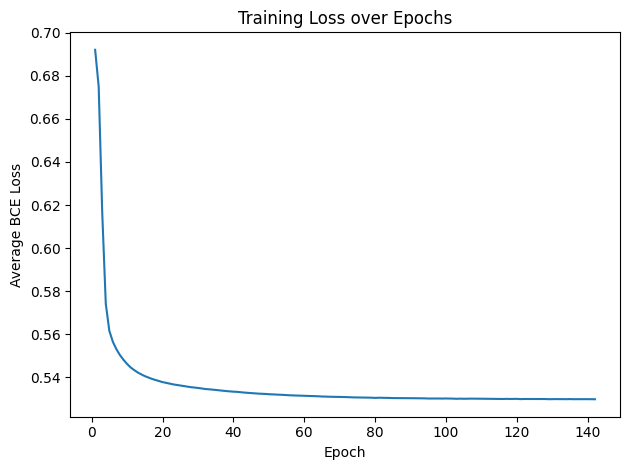

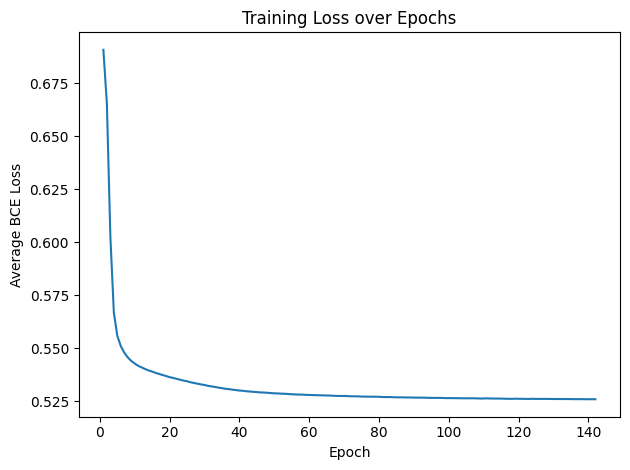

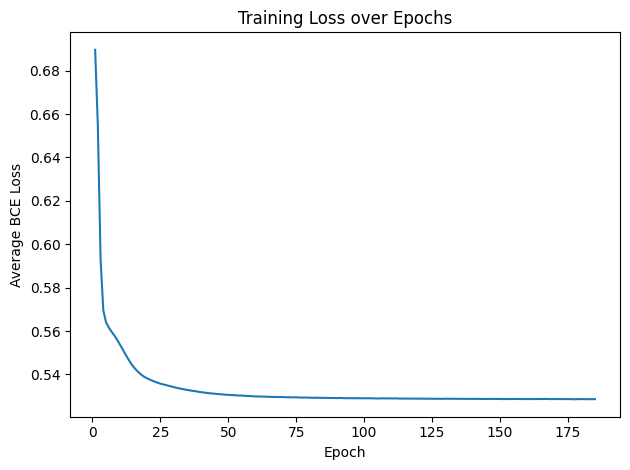

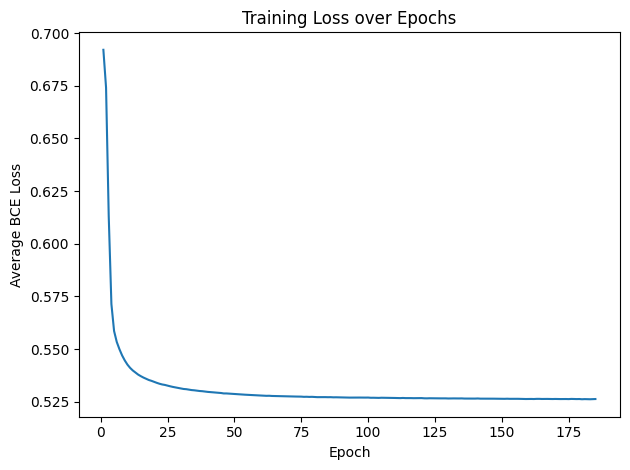

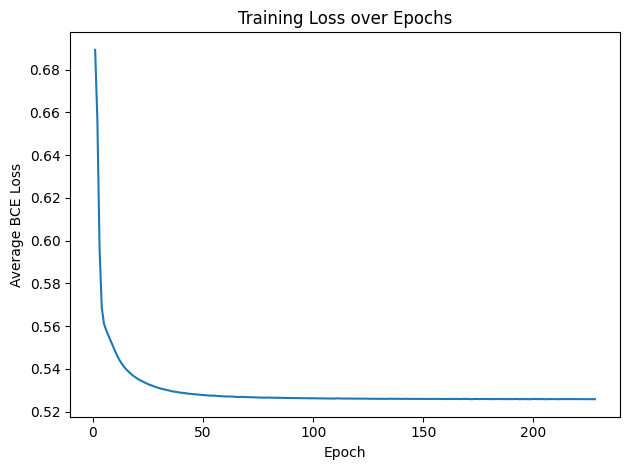

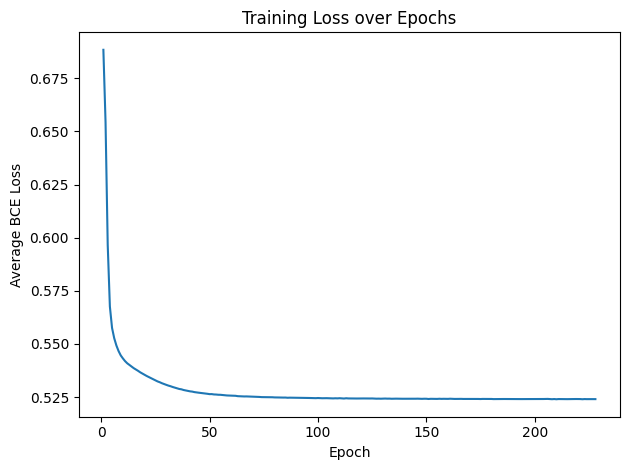

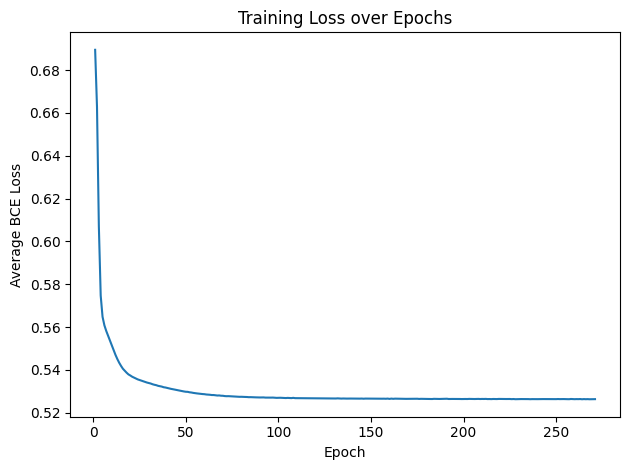

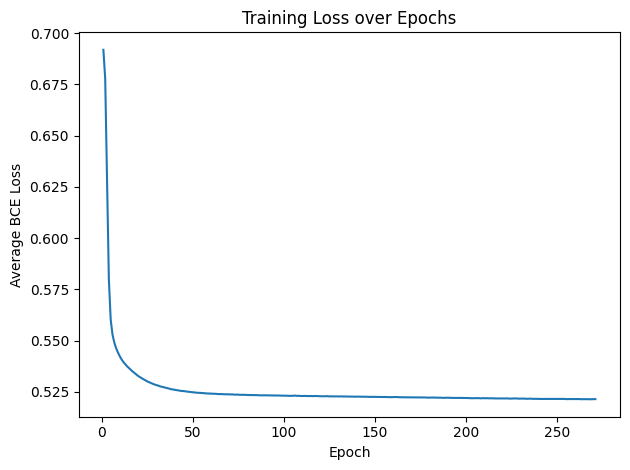

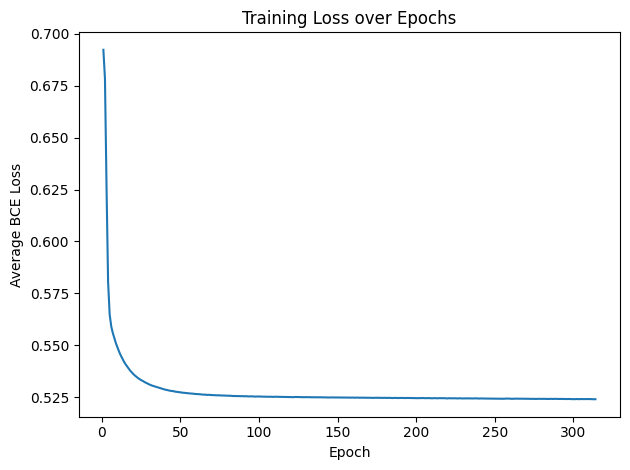

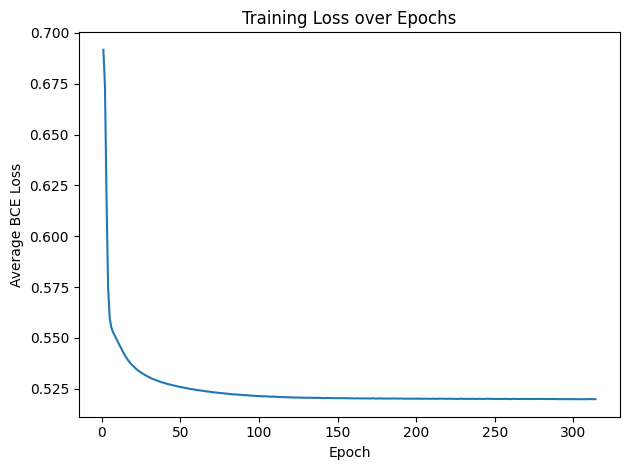

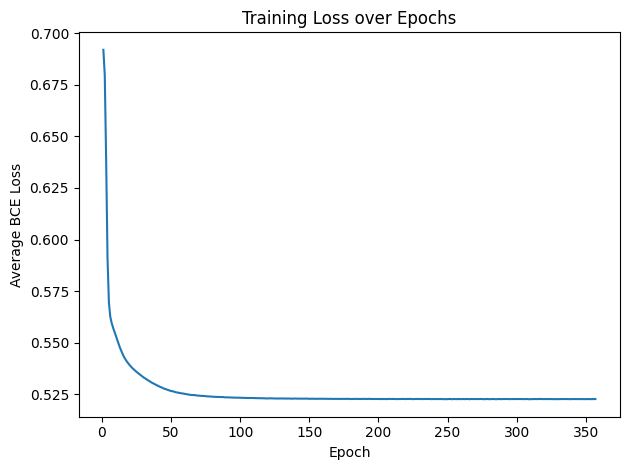

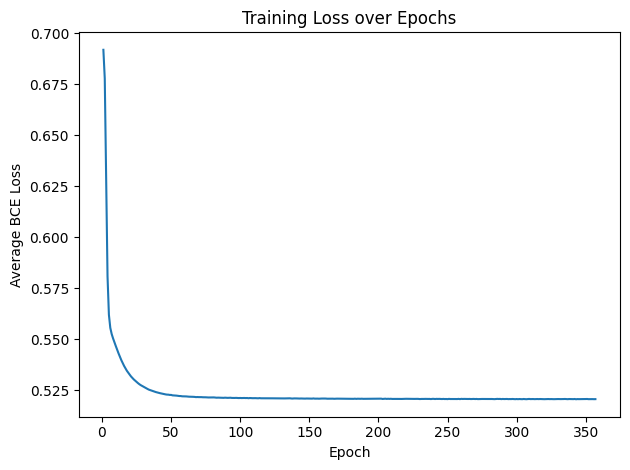

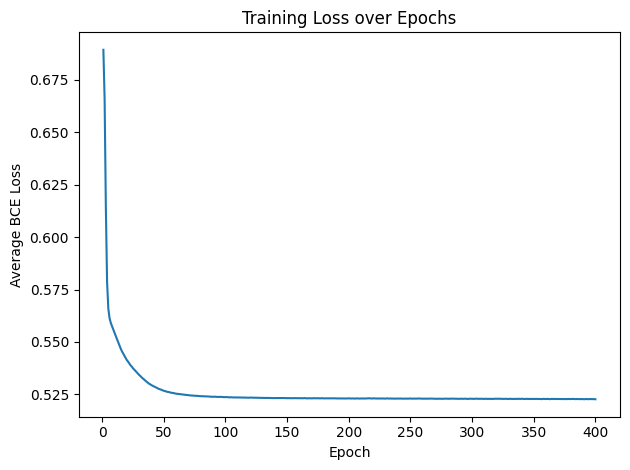

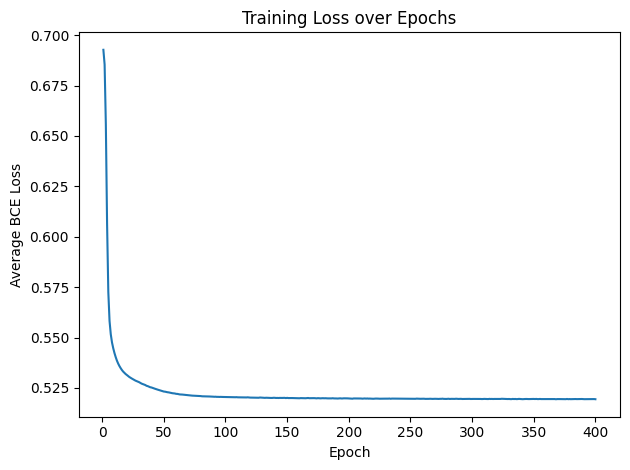

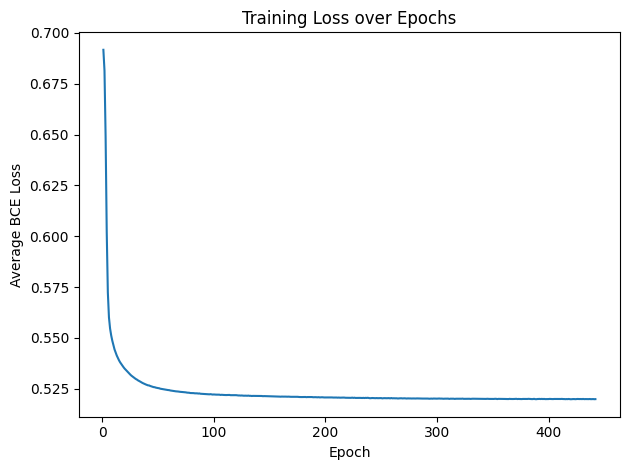

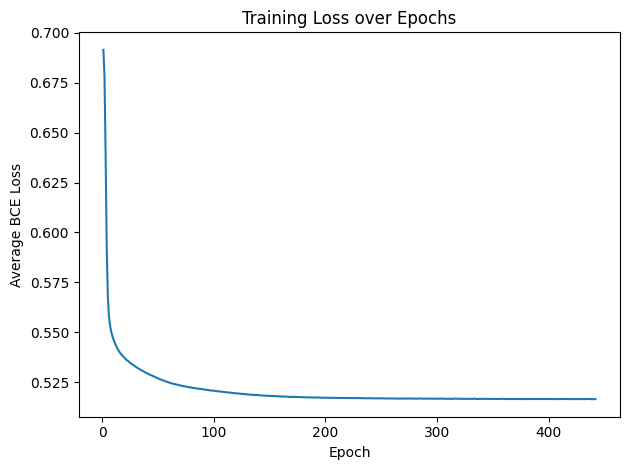

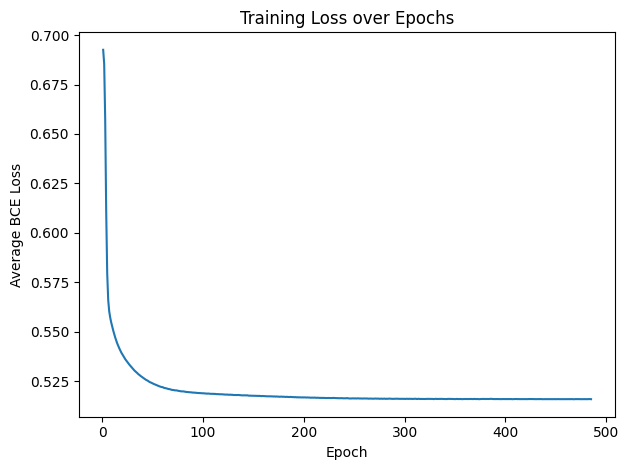

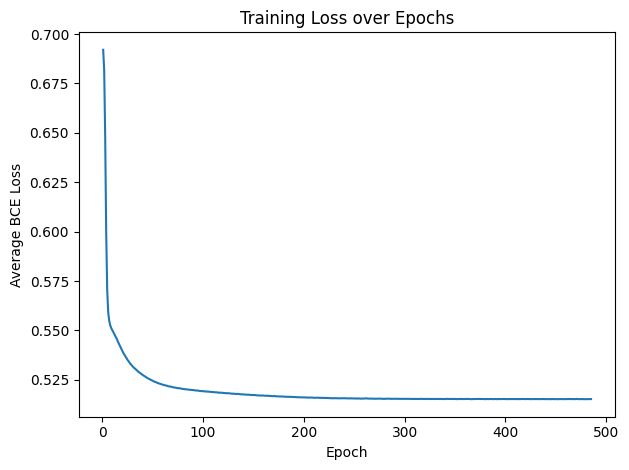

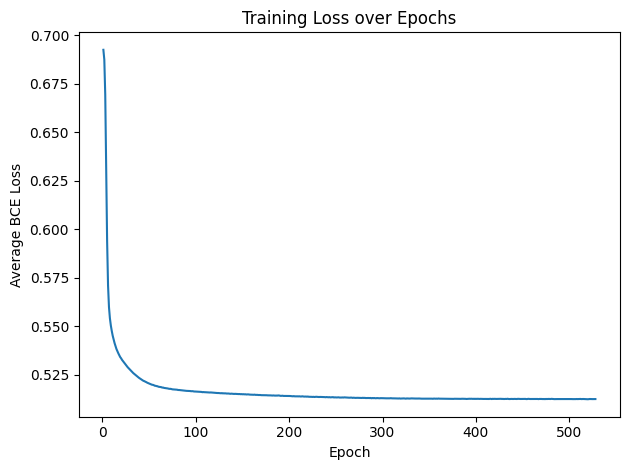

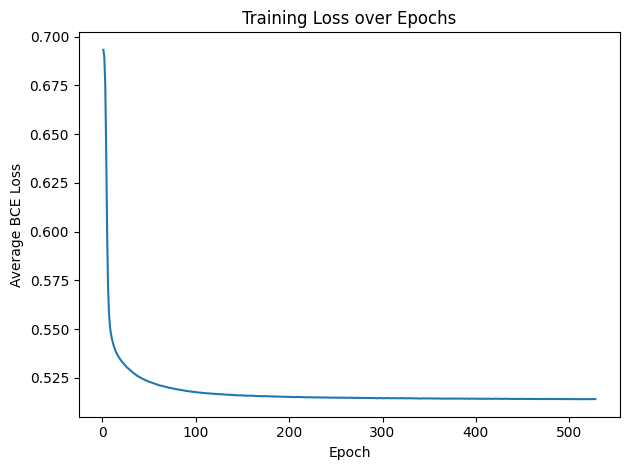

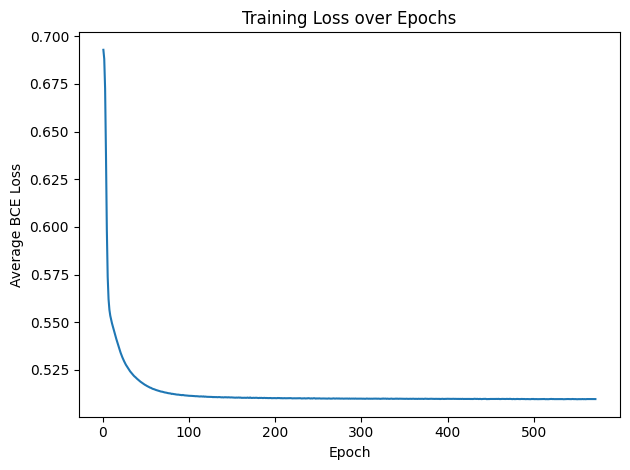

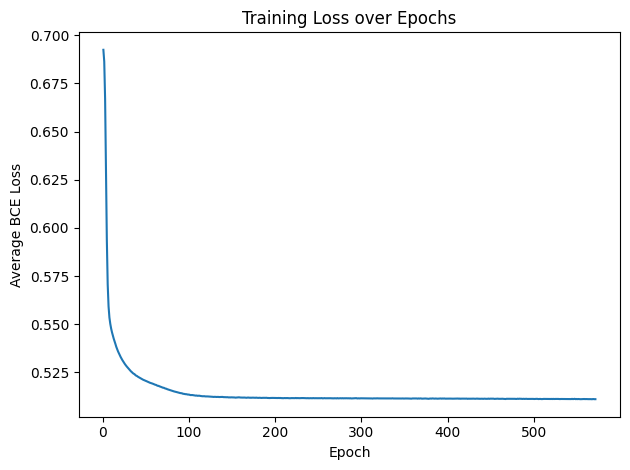

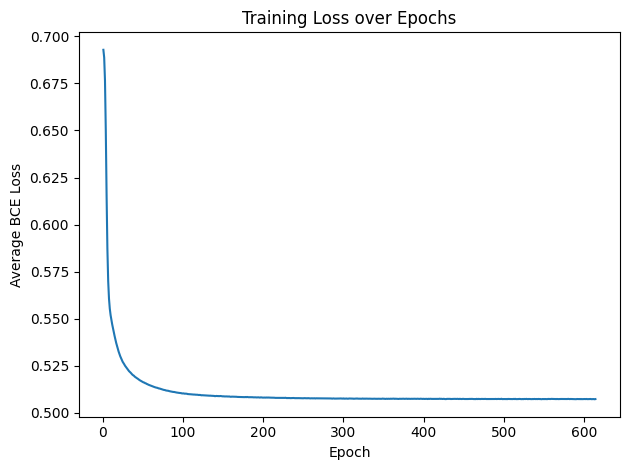

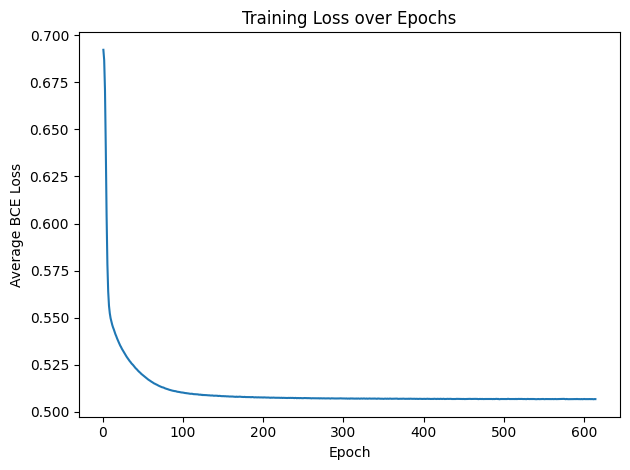

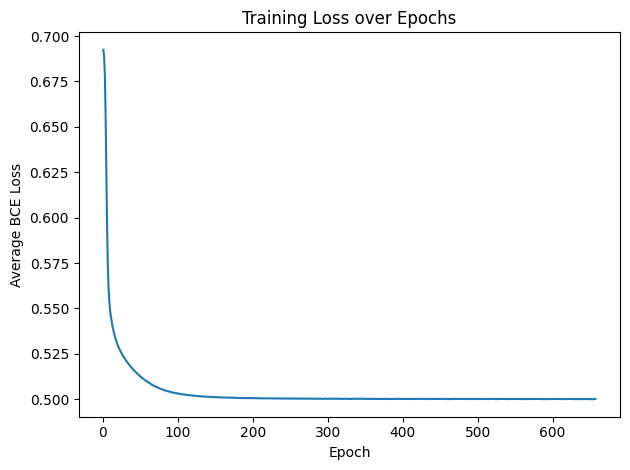

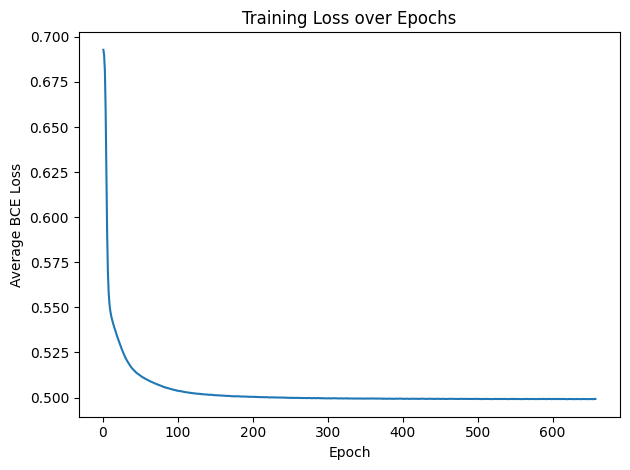

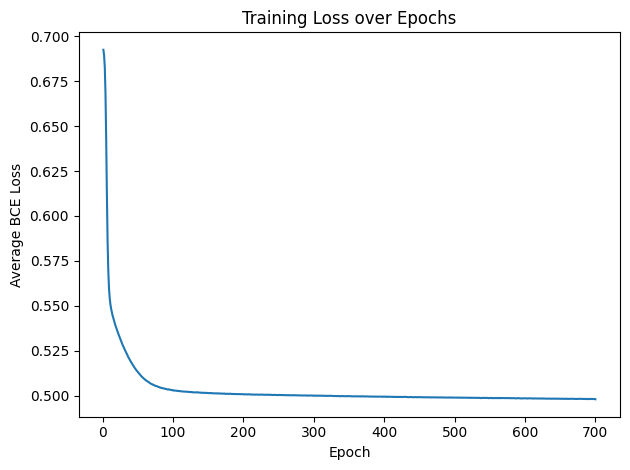

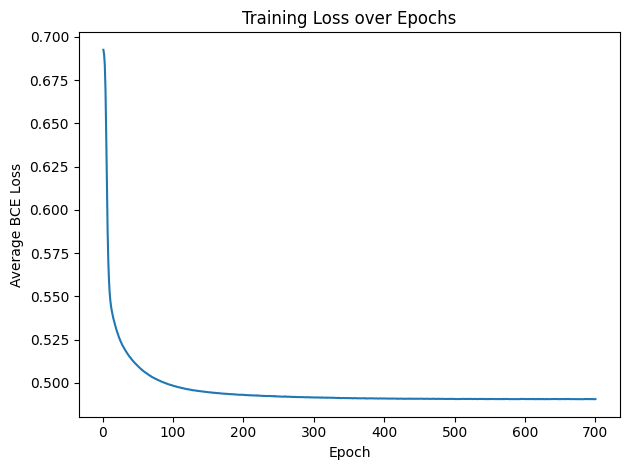

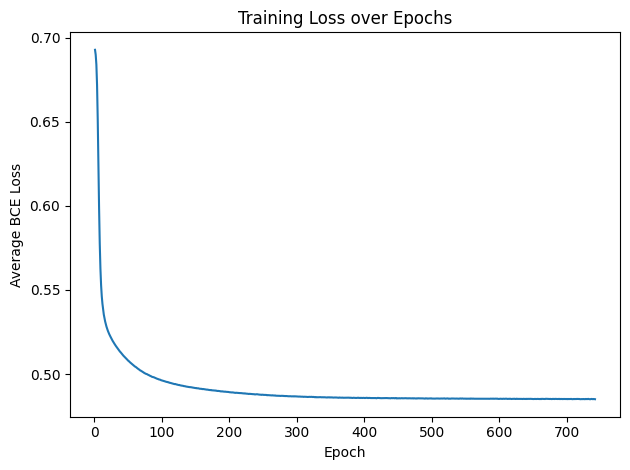

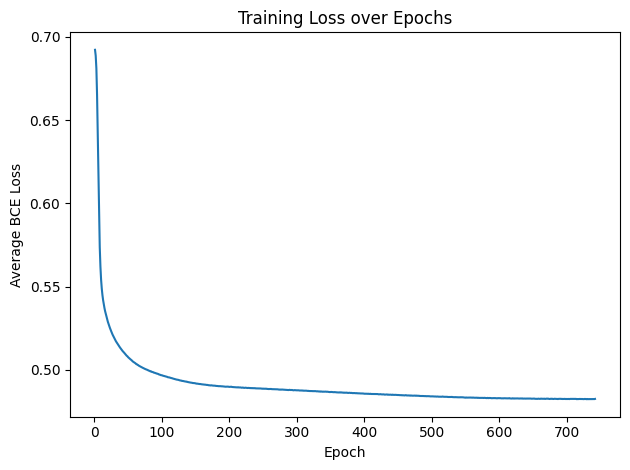

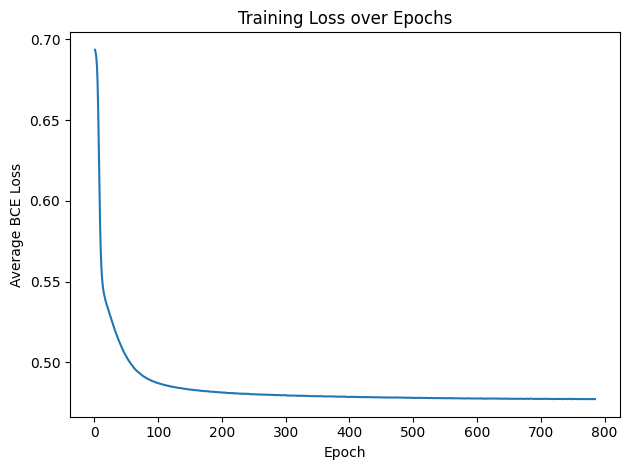

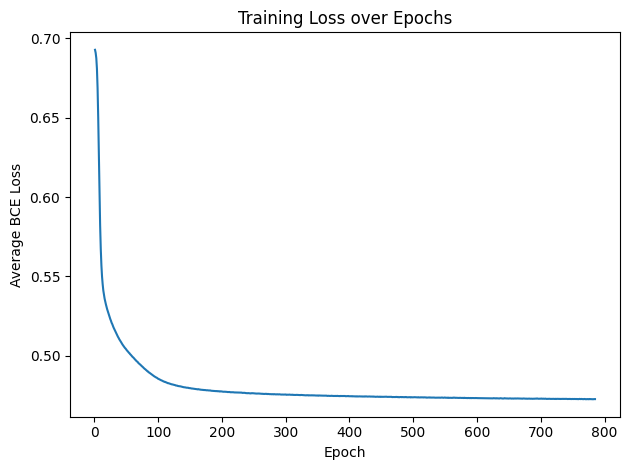

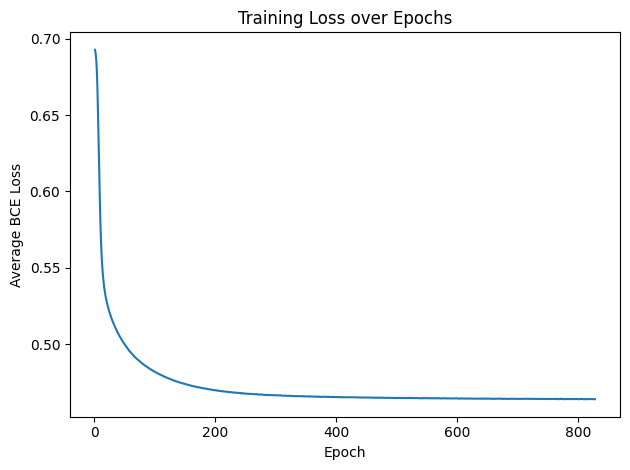

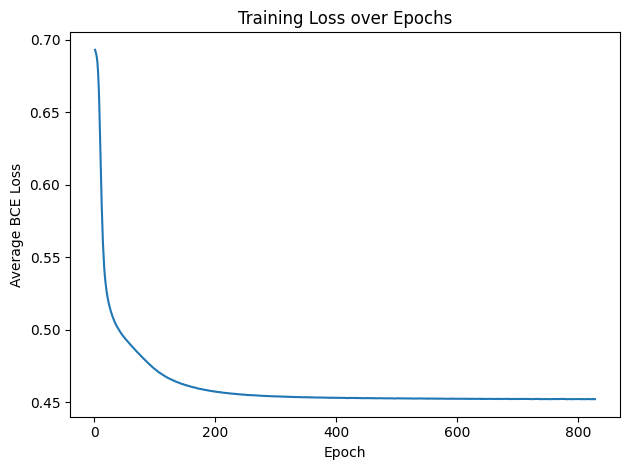

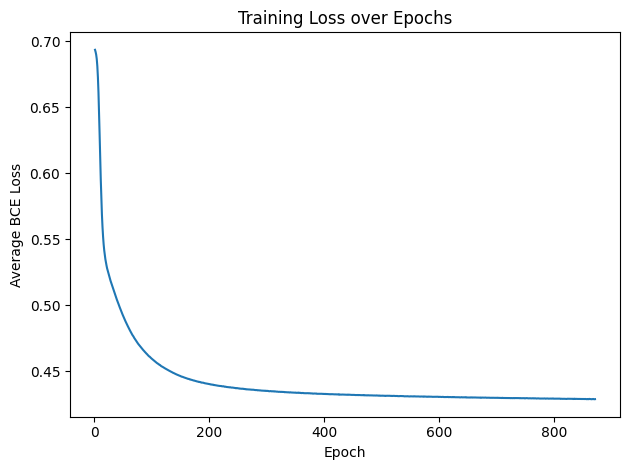

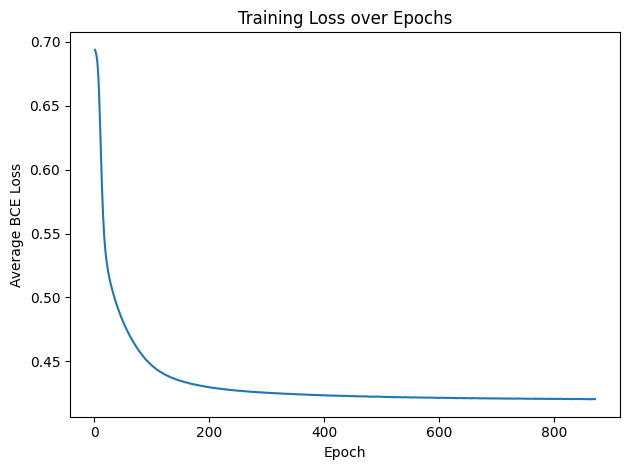

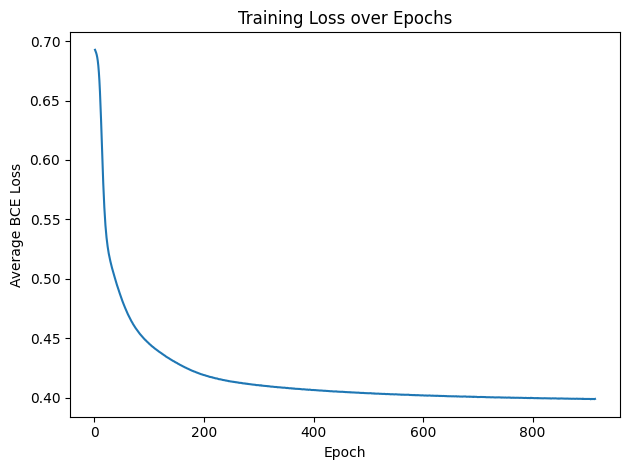

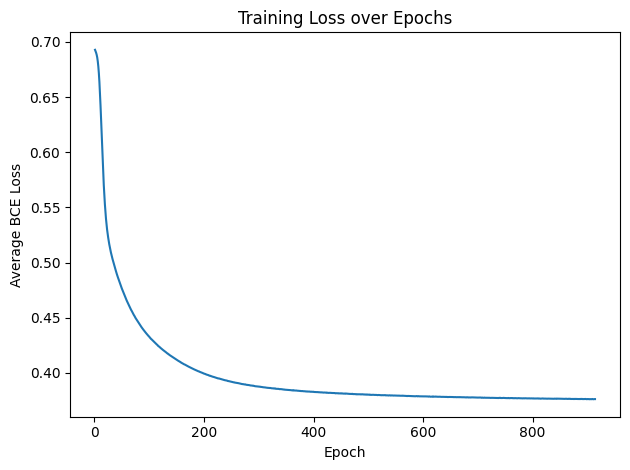

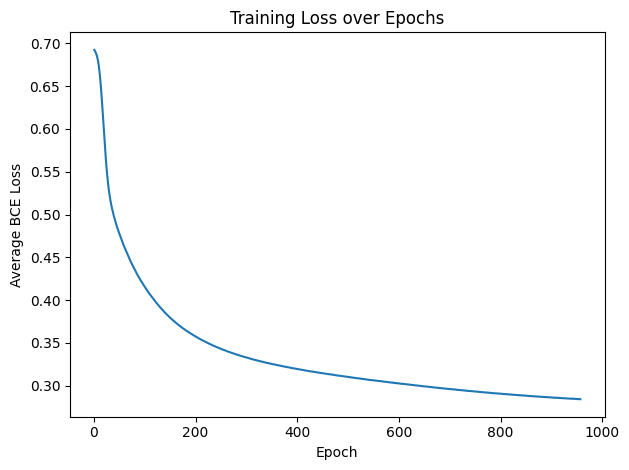

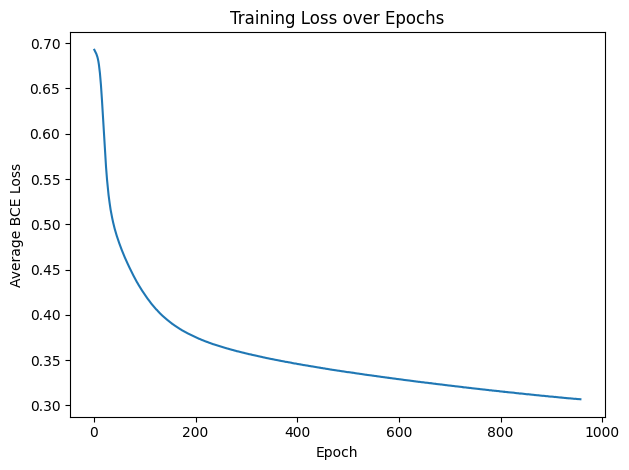

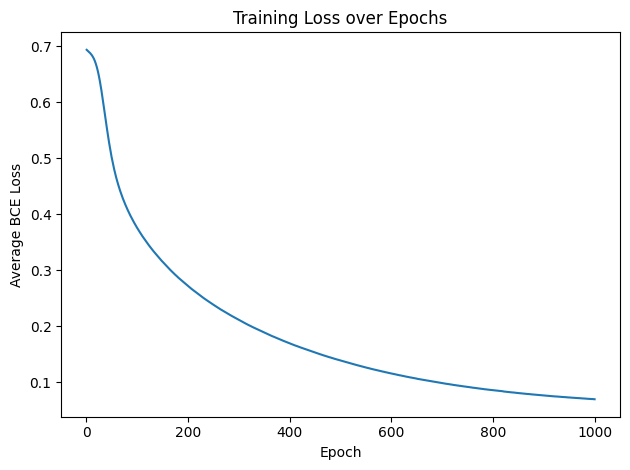

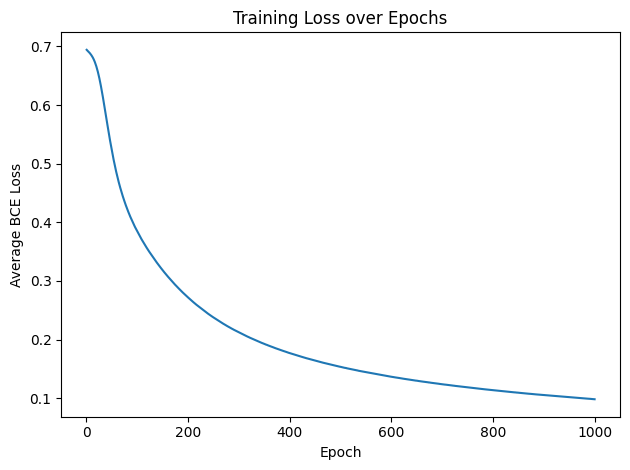

In [64]:
trust_matrix_dists = []

for n in [int(x) for x in np.linspace(500,10500,21)[::-1]]:
    epochs = int(-0.085714*n+1042.857)
    print(f'now testing samples with n={n} for {epochs} epochs')
    sample1 = datasplit_1[:n]
    sample2 = datasplit_2[:n]

    S1,C1 = train_trust_matrix(sample1, epochs=epochs)
    t1 = eigentrust(C1, alpha=0)
    S2,C2 = train_trust_matrix(sample2, epochs=epochs)
    t2 = eigentrust(C2, alpha=0)

    trust_matrix_dists.append([n,
                               S1.cpu().numpy().tolist(),
                               C1.cpu().numpy().tolist(),
                               t1.cpu().numpy().tolist(),
                               S2.cpu().numpy().tolist(),
                               C2.cpu().numpy().tolist(),
                               t2.cpu().numpy().tolist()])
    with open(f"figures/trust_matrix_dists_{n}.json", "w") as file:
        json.dump(trust_matrix_dists, file, indent=4)

In [88]:
# lists=[]
# for i in range(len(trust_matrix_dists)):
#     k=[trust_matrix_dists[i][0]]

#     for j in range(1,7):
#         k.append(trust_matrix_dists[i][j].tolist())
#     lists.append(k)
# with open("trust_matrix_dists.json", "w") as file:
#     json.dump(lists, file, indent=4)
# import json
data=[]
with open("figures/5_14_25/trust_matrices.json",'r') as file:
    data = json.load(file)

data2=[]
for i in range(len(data)):
    k=[data[i][0]]

    for j in range(1,7):
        k.append(np.array(data[i][j]))
    data2.append(k)

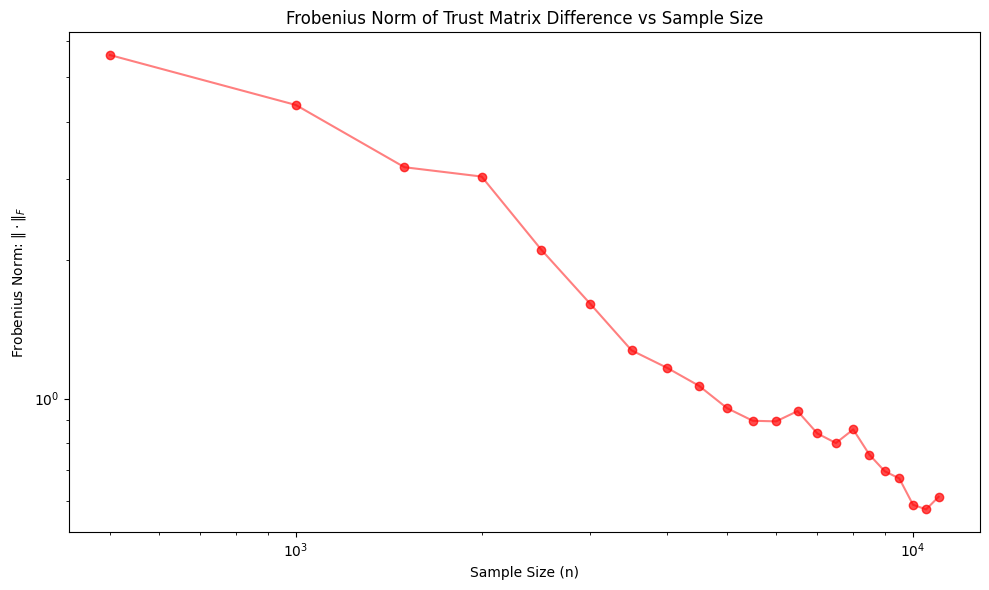

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import norm

# Create separate lists for each metric you want to plot
frob_norm_S_data = []
l2_norm_S_data = []
frob_norm_C_data = []
l2_norm_C_data = []
l1_norm_t_data = []
l2_norm_t_data = []

# Process the trust_matrix_dists
for i in range(len(data2)):
    a = data2[i]
    n = a[0]    # sample size
    S1 = a[1]   # first S matrix
    C1 = a[2]   # first C matrix
    t1 = a[3]   # first t vector
    S2 = a[4]   # second S matrix
    C2 = a[5]   # second C matrix
    t2 = a[6]   # second t vector
    
    # Frobenius norm of S1-S2
    frob_norm_S = norm(S1-S2, 'fro')
    frob_norm_S_data.append((n, frob_norm_S))
    
    # L2 norm of S1-S2 (spectral norm)
    l2_norm_S = norm(S1-S2, 2)
    l2_norm_S_data.append((n, l2_norm_S))
    
    # Frobenius norm of C1-C2
    frob_norm_C = norm(C1-C2, 'fro')
    frob_norm_C_data.append((n, frob_norm_C))
    
    # L2 norm of C1-C2
    l2_norm_C = norm(C1-C2, 2)
    l2_norm_C_data.append((n, l2_norm_C))
    
    # L1 norm of t1-t2
    l1_norm_t = norm(t1-t2, 1)
    l1_norm_t_data.append((n, l1_norm_t))
    
    # L2 norm of t1-t2
    l2_norm_t = norm(t1-t2, 2)
    l2_norm_t_data.append((n, l2_norm_t))

# Create a single figure with six plots in a 2x3 layout
plt.figure(figsize=(10,6))  # Adjusted for 2x3 layout

# # 1. Frobenius Norm of S1-S2
# plt.subplot(2, 3, 1)
# n_values, norm_values = zip(*sorted(frob_norm_S_data, key=lambda x: x[0]))
# plt.scatter(n_values, norm_values, color='blue', alpha=0.7)
# plt.plot(n_values, norm_values, color='blue', alpha=0.5)
# plt.title('Frobenius Norm of Trust Matrices vs Sample Size')
# plt.xlabel('Sample Size (n)')
# plt.ylabel(r'Frobenius Norm: $\|\cdot\|_F$')
# # plt.xscale('log')
# plt.yscale('log')

# # 2. L2 Norm of S1-S2
# plt.subplot(2, 3, 4)
# n_values, norm_values = zip(*sorted(l2_norm_S_data, key=lambda x: x[0]))
# plt.scatter(n_values, norm_values, color='green', alpha=0.7)
# plt.plot(n_values, norm_values, color='green', alpha=0.5)
# plt.title(r'$2$-Norm of Trust Matrices vs Sample Size')
# plt.xlabel('Sample Size (n)')
# plt.ylabel(r'$2$-Norm: $\|\cdot\|_2$')
# # plt.xscale('log')
# plt.yscale('log')

# 3. Frobenius Norm of C1-C2

n_values, norm_values = zip(*sorted(frob_norm_C_data, key=lambda x: x[0]))
plt.scatter(n_values, norm_values, color='blue', alpha=0.7)
plt.plot(n_values, norm_values, color='red', alpha=0.5)
plt.title('Frobenius Norm of Trust Matrix Difference vs Sample Size')
plt.xlabel('Sample Size (n)')
plt.ylabel(r'Frobenius Norm: $\|\cdot\|_F$')
plt.xscale('log')
plt.yscale('log')

# # 4. L2 Norm of C1-C2
# plt.subplot(2, 3, 5)
# n_values, norm_values = zip(*sorted(l2_norm_C_data, key=lambda x: x[0]))
# plt.scatter(n_values, norm_values, color='teal', alpha=0.7)
# plt.plot(n_values, norm_values, color='teal', alpha=0.5)
# plt.title(r'$2$-Norm of Normalized Trust Matrices vs Sample Size')
# plt.xlabel('Sample Size (n)')
# plt.ylabel(r'$2$-Norm: $\|\cdot\|_2$')
# # plt.xscale('log')
# plt.yscale('log')

# # 5. L1 Norm of t1-t2
# plt.subplot(2, 3, 3)
# n_values, norm_values = zip(*sorted(l1_norm_t_data, key=lambda x: x[0]))
# plt.scatter(n_values, norm_values, color='purple', alpha=0.7)
# plt.plot(n_values, norm_values, color='purple', alpha=0.5)
# plt.title(r'$1$-Norm of EigenTrust Vectors vs Sample Size')
# plt.xlabel('Sample Size (n)')
# plt.ylabel(r'$1$-Norm: $\|\cdot\|_1$')
# # plt.xscale('log')
# plt.yscale('log')

# # 6. L2 Norm of t1-t2
# plt.subplot(2, 3, 6)
# n_values, norm_values = zip(*sorted(l2_norm_t_data, key=lambda x: x[0]))
# plt.scatter(n_values, norm_values, color='orange', alpha=0.7)
# plt.plot(n_values, norm_values, color='orange', alpha=0.5)
# plt.title(r'$2$-Norm of EigenTrust Vectors vs Sample Size')
# plt.xlabel('Sample Size (n)')
# plt.ylabel(r'$2$-Norm: $\|\cdot\|_2$')
# # plt.xscale('log')
# plt.yscale('log')

plt.tight_layout()
plt.savefig('figures/norm_comparisons.png', dpi=300)  # Optional: Save the figure
plt.show()

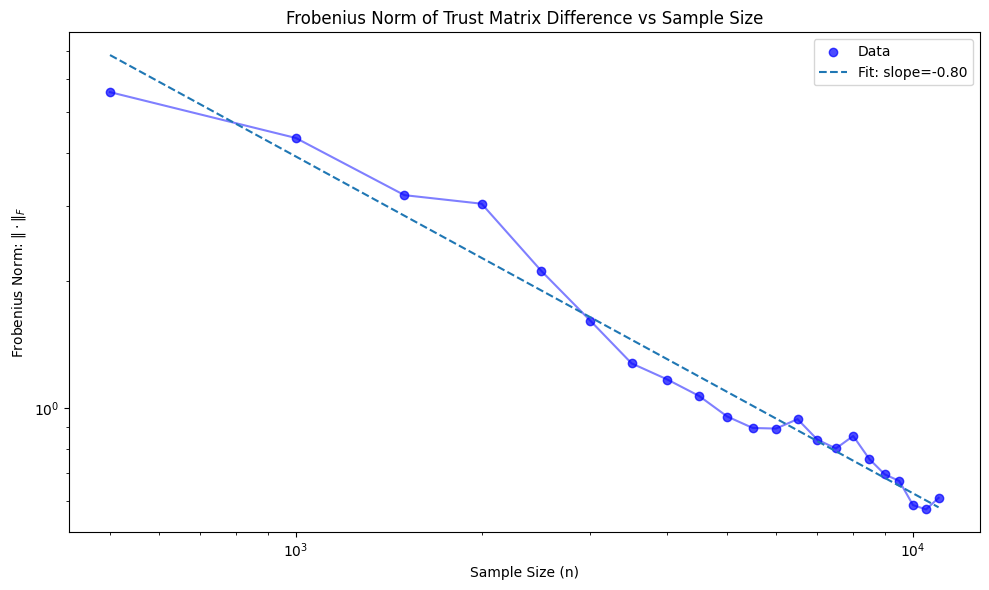

In [117]:
import numpy as np

# assume n_values, norm_values already exist from:
#   n_values, norm_values = zip(*sorted(frob_norm_C_data, key=lambda x: x[0]))

# 1) Fit a line to log–log data
log_n = np.log10(n_values)
log_y = np.log10(norm_values)
m, b = np.polyfit(log_n, log_y, 1)   # m=slope, b=intercept

# 2) Compute fitted curve in original scale
fit_values = 10**b * np.array(n_values)**m
plt.figure(figsize=(10,6))
# 3) Replot (or overplot) the fit
plt.scatter(n_values, norm_values, color='blue', alpha=0.7, label='Data')
plt.plot(n_values, norm_values, color='blue', alpha=0.5)
plt.plot(n_values, fit_values, linestyle='--',
         label=f'Fit: slope={m:.2f}')
plt.xscale('log')
plt.yscale('log')
plt.title('Frobenius Norm of Trust Matrix Difference vs Sample Size')
plt.xlabel('Sample Size (n)')
plt.ylabel(r'Frobenius Norm: $\|\cdot\|_F$')
plt.legend()
plt.tight_layout()
plt.savefig('figures/norm_comparisons.png', dpi=300)  # Optional: Save the figure
plt.show()


## To generate trust matrices on 100 samples of 1000 comparisons 5/14 data

In [80]:
## Power law on new data 5/13
from BT import *
import json
import numpy as np
from eigentrust import *
import random

In [81]:
data_path = '20250513_224000'
data = []
filepath = f'transcript/{data_path}/evaluations_cleaned.json'
with open(filepath, 'r') as file:
    data.extend(json.load(file))
len(data)

comparisons = []

for i, item in enumerate(data):
    response = item['judge response']
    m = re.search(r'<choice>(.)</choice>', response)
    if m:
        score = int(m.group(1))
        comparisons.append([item['judge'], item['eval1'], item['eval2'], score])


In [82]:
func = {'(0, 0)': 0,
        '(0, 1)': 1,
        '(0, 2)': 2,
        '(0, 3)': 3,
        '(0, 4)': 4,
        '(1, 0)': 5,
        '(1, 1)': 6,
        '(1, 2)': 7,
        '(1, 3)': 8,
        '(1, 4)': 9,
        '(2, 0)': 10,
        '(2, 1)': 11,
        '(2, 2)': 12,
        '(2, 3)': 13,
        '(2, 4)': 14,
        '(3, 0)': 15,
        '(3, 1)': 16,
        '(3, 2)': 17,
        '(3, 3)': 18,
        '(3, 4)': 19,
        '(4, 0)': 20,
        '(4, 1)': 21,
        '(4, 2)': 22,
        '(4, 3)': 23,
        '(4, 4)': 24,}


In [83]:

mapped_comparisons = []
for item in comparisons:
    l = [func[x] for x in item[:3]]
    l.append(item[3])
    mapped_comparisons.append(l)
    


In [84]:
len(mapped_comparisons)

22629

In [ ]:
def train_trust_matrix(data,epochs):

    batch_size=32
    dataset = PairwiseDataset(data)
    dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

    num_models = 25
    d = 6

    lr = 1e-3
    weight_decay = 1e-4
    max_epochs = epochs

    model = VectorBT(num_models, d)
    train_vector_bt(
        model, 
        dataloader,
        lr=lr, 
        weight_decay=weight_decay,
        max_epochs=max_epochs, 
        device='mps'
    )

    device = 'mps'
    S = compute_trust_matrix(model, device)
    C = row_normalize(S)

    return S,C

sample 0
Epoch  10, Loss = 0.6820
Epoch  20, Loss = 0.6210
Epoch  30, Loss = 0.5432
Epoch  40, Loss = 0.5017
Epoch  50, Loss = 0.4762
Epoch  60, Loss = 0.4575
Epoch  70, Loss = 0.4429
Epoch  80, Loss = 0.4315
Epoch  90, Loss = 0.4222
Epoch 100, Loss = 0.4145
Epoch 110, Loss = 0.4078
Epoch 120, Loss = 0.4020
Epoch 130, Loss = 0.3965
Epoch 140, Loss = 0.3919
Epoch 150, Loss = 0.3876
Epoch 160, Loss = 0.3836
Epoch 170, Loss = 0.3798
Epoch 180, Loss = 0.3764
Epoch 190, Loss = 0.3733
Epoch 200, Loss = 0.3703
Epoch 210, Loss = 0.3677
Epoch 220, Loss = 0.3652
Epoch 230, Loss = 0.3628
Epoch 240, Loss = 0.3606
Epoch 250, Loss = 0.3585
Epoch 260, Loss = 0.3567
Epoch 270, Loss = 0.3548
Epoch 280, Loss = 0.3531
Epoch 290, Loss = 0.3513
Epoch 300, Loss = 0.3498
Epoch 310, Loss = 0.3482
Epoch 320, Loss = 0.3468
Epoch 330, Loss = 0.3452
Epoch 340, Loss = 0.3440
Epoch 350, Loss = 0.3426
Epoch 360, Loss = 0.3415
Epoch 370, Loss = 0.3402
Epoch 380, Loss = 0.3391
Epoch 390, Loss = 0.3379
Epoch 400, Loss 

  2%|▏         | 17/1000 [00:00<00:01, 702.04it/s]

sample 1


Epoch  10, Loss = 0.6746
Epoch  20, Loss = 0.6057
Epoch  30, Loss = 0.5413
Epoch  40, Loss = 0.5066
Epoch  50, Loss = 0.4844
Epoch  60, Loss = 0.4681
Epoch  70, Loss = 0.4551
Epoch  80, Loss = 0.4445
Epoch  90, Loss = 0.4354
Epoch 100, Loss = 0.4276
Epoch 110, Loss = 0.4202
Epoch 120, Loss = 0.4136
Epoch 130, Loss = 0.4075
Epoch 140, Loss = 0.4018
Epoch 150, Loss = 0.3964
Epoch 160, Loss = 0.3913
Epoch 170, Loss = 0.3868


KeyboardInterrupt: 

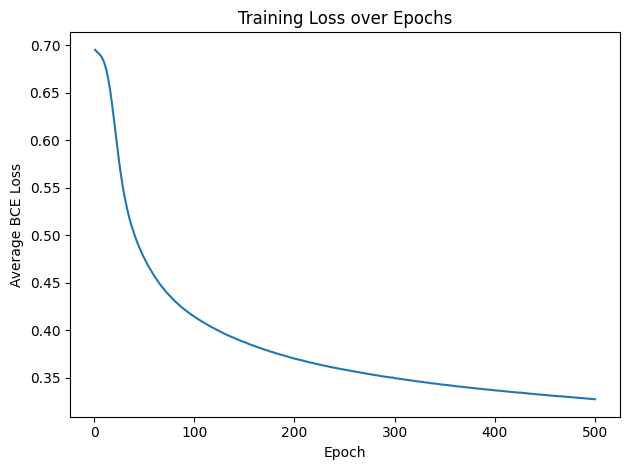

In [87]:
trust_matrices = []
path = "transcript/20250513_224000/samples/trust_matrices.json"

for i in range(100):
    print(f'sample {i}')
    sample = random.sample(mapped_comparisons,1000)

    epochs = 500

    S,C = train_trust_matrix(sample, epochs=epochs)
    t = eigentrust(C, alpha=0)

    trust_matrices.append([S.cpu().numpy().tolist(),
                            C.cpu().numpy().tolist(),
                            t.cpu().numpy().tolist()])
    
    if i%5==0:
        with open(path, "w") as file:
            json.dump(trust_matrices, file, indent=4)

## Computing the variance now

In [2]:
import json
import numpy as np
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

In [5]:
with open('figures/errors/trust_matrices.json', 'r') as file:
    data = json.load(file)
# with open('figures/errors/trust_matrices2.json', 'r') as file:
    # data2 = json.load(file)

In [8]:
data3 = data# + data2

In [9]:
trust_vectors = [i[2] for i in data3]

In [10]:
len(trust_vectors)

96

In [ ]:
means = np.array([   0.0144,   0.0326,   0.0657,   0.0748,   0.0070,   0.0148,   
                     0.0247,   0.1190,   0.0457,   0.0067,   0.0149,   0.0243,   
                     0.0626,   0.0560,   0.0104,   0.0113,   0.0216,   0.0514,  
                     0.0921,   0.0080,   0.0124,   0.0382,   0.0789,   0.1068,
                     0.0059,])

In [13]:
means = np.mean(np.array(trust_vectors), axis=0)

In [14]:
means

array([0.00660808, 0.01687976, 0.05909796, 0.07866505, 0.00306244,
       0.00773423, 0.01277483, 0.11022057, 0.04310762, 0.00271677,
       0.01042264, 0.01371727, 0.04805721, 0.06864953, 0.00492736,
       0.00496596, 0.01262679, 0.04416739, 0.10192492, 0.00437953,
       0.00709734, 0.02852126, 0.09949934, 0.2081694 , 0.00200573])

In [17]:
trust_vectors[1]

[0.0010546187404543161,
 0.0026825331151485443,
 0.011915391311049461,
 0.02162908762693405,
 0.001542477635666728,
 0.0010197839001193643,
 0.0032951030880212784,
 0.08156728744506836,
 0.12640346586704254,
 0.0005220849416218698,
 0.004122156649827957,
 0.0015568295493721962,
 0.03955704718828201,
 0.010384508408606052,
 0.0004949450376443565,
 0.0005490297917276621,
 0.0015261356020346284,
 0.006574048660695553,
 0.07263355702161789,
 0.00047944881953299046,
 0.004234342835843563,
 0.4858688414096832,
 0.025240300223231316,
 0.09461565315723419,
 0.0005339058116078377]

In [73]:
for i in range(len(trust_vectors)):
    print(i, np.linalg.norm(means - trust_vectors[i]))

0 0.8800438211708378
1 0.4746164006378264
2 0.24415905048761083
3 0.29057340387501146
4 0.14826034915471756
5 0.22566551954147035
6 0.49629300894356776
7 0.9103356070005093
8 0.14709029696500986
9 0.38084861973698314
10 0.4751397225885255
11 0.7904554555121205
12 0.16234845454203845
13 0.22134137757994027
14 0.3466512797077093
15 0.18587901519723976
16 0.2849421464050745
17 0.23664147627270005
18 0.8129621393909546
19 0.8705951177939386
20 0.21873459583487412
21 0.28301967363746144
22 0.4684811023717584
23 0.23148000703081223
24 0.17801620059873588
25 0.40713850688259445
26 0.7686136202616464
27 0.23689481381200503
28 0.1536425627306215
29 0.3099749264294076
30 0.21254561425323923
31 0.4074124432472331
32 0.351521571978911
33 0.8301201865746966
34 0.087553491484033
35 0.4929663772558545
36 0.9607436137049227
37 0.45771792783208004
38 0.5367847720498997
39 0.16311822296814255
40 0.16340847398711195
41 0.21870726279883612
42 0.9070223543971726
43 0.3404994817033613
44 0.22394930365362364

In [1]:
means = np.mean(trust_vectors, axis=0)

NameError: name 'np' is not defined

In [63]:
covariance = np.zeros((25,25))

for j in range(25):
    for k in range(25):
        var_jk = 0
        for s in trust_vectors:
            var_jk += (s[j]-means[j]) * (s[k]-means[k])
        covariance[j,k] = var_jk / len(trust_vectors)

In [74]:
cov = covariance / 1000

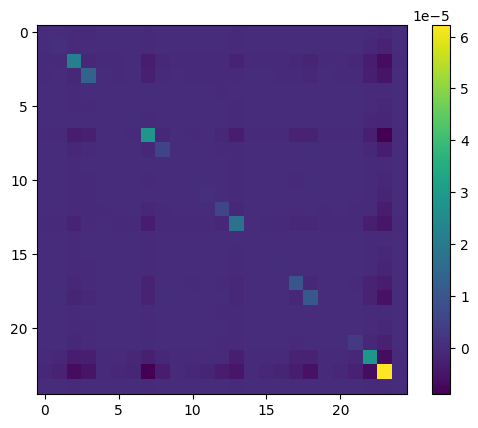

In [75]:
data = cov

# Create heatmap
plt.imshow(data, cmap='viridis')#, norm=LogNorm())
plt.colorbar()
plt.show()

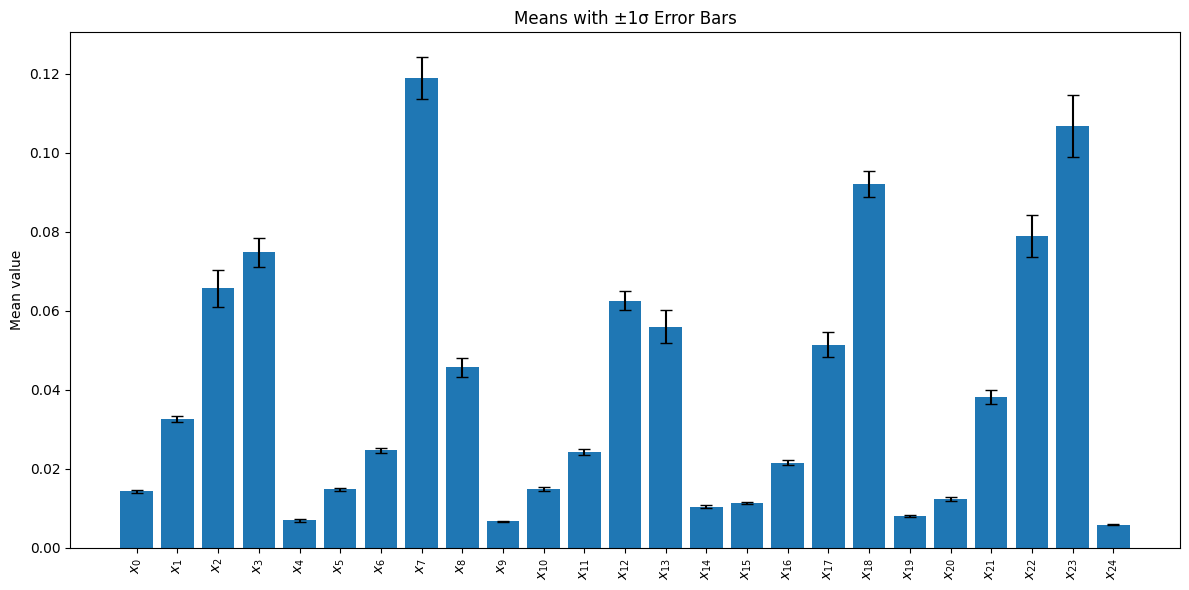

In [80]:
stds  = np.sqrt(np.diag(cov))

# x-locations and labels
inds = np.arange(len(means))
labels = [f"$x_{{{i}}}$" for i in inds]

# plot
plt.figure(figsize=(12, 6))
plt.bar(inds, means, yerr=stds, capsize=4)
plt.xticks(inds, labels, rotation=90)
plt.ylabel("Mean value")
plt.title("Means with ±1σ Error Bars")
plt.tight_layout()
plt.show()


In [82]:
np.sqrt(cov[23,23])

0.00789247552265936